# Overhead experiment, with runtime, AWS Lambda, various state sizes
Results are obtained via code commit: https://github.com/wzorgdrager/stateful_dataflows/commit/178587d3e78ca0a3526dee4a9e0f8540cac2fc69

In [117]:
import pandas as pd
from matplotlib import rcParams, rc
import matplotlib
import matplotlib.font_manager as font_manager
import matplotlib.ticker as mticker

# Add every font at the specified location
font_dir = ['.']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
rcParams['font.family'] = 'Verdana'
rcParams['figure.figsize'] = [8, 6]
rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
import matplotlib.pyplot as plt

In [118]:
fiftykb_data = pd.read_csv("with_runtime/aws_lambda_50kb.csv")
fiftykb_data["stateflow"] = fiftykb_data["ACTOR_CONSTRUCTION"] + fiftykb_data["ROUTING_DURATION"] + fiftykb_data["EVENT_SERIALIZATION_DURATION"] + fiftykb_data["STATE_SERIALIZATION_DURATION"] 
fiftykb_data["aws"] = fiftykb_data["READ_STATE"] + fiftykb_data["KEY_LOCKING"] + fiftykb_data["WRITE_STATE"]

fiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,49.500000,0.050828,0.122578,0.026766,0.014249,19.806671,6.345428,6.609045,0.214421,32.761144
std,29.011492,29.011492,0.004337,0.005759,0.003028,0.002753,17.876507,3.327016,2.064525,0.009071,18.466893
min,0.000000,0.000000,0.045262,0.114043,0.024072,0.012251,16.966459,4.792406,5.828457,0.198553,27.703464
25%,24.750000,24.750000,0.048455,0.119057,0.025651,0.013325,17.559893,5.349930,6.107275,0.208141,29.573319
50%,49.500000,49.500000,0.049693,0.121696,0.026307,0.013739,17.838767,5.892943,6.282444,0.213262,30.062945
75%,74.250000,74.250000,0.051743,0.124802,0.026968,0.014218,18.340333,6.263609,6.540152,0.217679,31.047198
max,99.000000,99.000000,0.073260,0.155151,0.049572,0.031804,196.608925,30.121999,26.490449,0.249652,208.352692


In [119]:
hundredkb_data = pd.read_csv("with_runtime/aws_lambda_100kb.csv")
hundredkb_data["stateflow"] = hundredkb_data["ACTOR_CONSTRUCTION"] + hundredkb_data["ROUTING_DURATION"] + hundredkb_data["EVENT_SERIALIZATION_DURATION"] + hundredkb_data["STATE_SERIALIZATION_DURATION"] 
hundredkb_data["aws"] = hundredkb_data["READ_STATE"] + hundredkb_data["KEY_LOCKING"] + hundredkb_data["WRITE_STATE"]

hundredkb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,49.500000,0.065340,0.124904,0.028775,0.017172,18.757063,10.249373,13.001603,0.236191,42.008038
std,29.011492,29.011492,0.007906,0.011180,0.005071,0.001189,1.541031,3.269921,1.160773,0.015610,3.819552
min,0.000000,0.000000,0.056220,0.113902,0.026437,0.014934,17.477211,8.656032,11.566842,0.214506,38.567038
25%,24.750000,24.750000,0.061899,0.119928,0.027236,0.016482,18.052408,9.447663,12.420064,0.227881,40.334168
50%,49.500000,49.500000,0.063549,0.122312,0.027757,0.017098,18.448798,9.772953,12.721762,0.231312,41.407156
75%,74.250000,74.250000,0.065467,0.124212,0.028529,0.017676,18.838290,10.494861,13.271912,0.238592,42.453713
max,99.000000,99.000000,0.110071,0.200786,0.065695,0.026007,29.459923,41.746674,18.719941,0.309613,73.276813


In [120]:
hundredfiftykb_data = pd.read_csv("with_runtime/aws_lambda_150kb.csv")
hundredfiftykb_data["stateflow"] = hundredfiftykb_data["ACTOR_CONSTRUCTION"] + hundredfiftykb_data["ROUTING_DURATION"] + hundredfiftykb_data["EVENT_SERIALIZATION_DURATION"] + hundredfiftykb_data["STATE_SERIALIZATION_DURATION"] 
hundredfiftykb_data["aws"] = hundredfiftykb_data["READ_STATE"] + hundredfiftykb_data["KEY_LOCKING"] + hundredfiftykb_data["WRITE_STATE"]

hundredfiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,49.500000,0.080406,0.126604,0.031036,0.017127,19.790429,13.936515,18.705586,0.255173,52.432530
std,29.011492,29.011492,0.010591,0.014874,0.025643,0.003503,5.063268,2.475597,3.260498,0.034211,7.563838
min,0.000000,0.000000,0.068836,0.113884,0.025388,0.015068,17.571483,11.603574,16.545725,0.229889,46.733613
25%,24.750000,24.750000,0.075106,0.119276,0.027206,0.016135,18.235955,12.702118,17.236130,0.239819,48.780169
50%,49.500000,49.500000,0.078084,0.122088,0.027780,0.016487,18.550199,13.414160,17.834468,0.246950,50.181717
75%,74.250000,74.250000,0.081719,0.126945,0.028581,0.017113,19.320898,14.072559,19.203816,0.257222,53.277474
max,99.000000,99.000000,0.150632,0.198316,0.281301,0.046998,56.061133,28.519100,45.213097,0.519723,96.749173


In [121]:
twohundredkb_data = pd.read_csv("with_runtime/aws_lambda_200kb.csv")
twohundredkb_data["stateflow"] = twohundredkb_data["ACTOR_CONSTRUCTION"] + twohundredkb_data["ROUTING_DURATION"] + twohundredkb_data["EVENT_SERIALIZATION_DURATION"] + twohundredkb_data["STATE_SERIALIZATION_DURATION"] 
twohundredkb_data["aws"] = twohundredkb_data["READ_STATE"] + twohundredkb_data["KEY_LOCKING"] + twohundredkb_data["WRITE_STATE"]

hundredfiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,49.500000,0.080406,0.126604,0.031036,0.017127,19.790429,13.936515,18.705586,0.255173,52.432530
std,29.011492,29.011492,0.010591,0.014874,0.025643,0.003503,5.063268,2.475597,3.260498,0.034211,7.563838
min,0.000000,0.000000,0.068836,0.113884,0.025388,0.015068,17.571483,11.603574,16.545725,0.229889,46.733613
25%,24.750000,24.750000,0.075106,0.119276,0.027206,0.016135,18.235955,12.702118,17.236130,0.239819,48.780169
50%,49.500000,49.500000,0.078084,0.122088,0.027780,0.016487,18.550199,13.414160,17.834468,0.246950,50.181717
75%,74.250000,74.250000,0.081719,0.126945,0.028581,0.017113,19.320898,14.072559,19.203816,0.257222,53.277474
max,99.000000,99.000000,0.150632,0.198316,0.281301,0.046998,56.061133,28.519100,45.213097,0.519723,96.749173


In [122]:
fiftykb_mean = fiftykb_data[["READ_STATE", "WRITE_STATE","KEY_LOCKING", "stateflow", "aws"]].mean().to_frame(name="50KB")
hundredkb_mean = hundredkb_data[["READ_STATE", "WRITE_STATE","KEY_LOCKING",  "stateflow", "aws"]].mean().to_frame(name="100KB")
hundredfiftykb_mean = hundredfiftykb_data[["READ_STATE", "WRITE_STATE","KEY_LOCKING",  "stateflow", "aws"]].mean().to_frame(name="150KB")
twohundredkb_mean = twohundredkb_data[["READ_STATE", "WRITE_STATE","KEY_LOCKING",  "stateflow", "aws"]].mean().to_frame(name="200KB")

fiftykb_std = fiftykb_data[["READ_STATE", "WRITE_STATE","KEY_LOCKING", "stateflow", "aws"]].std().to_frame(name="50KB")
hundredkb_std = hundredkb_data[["READ_STATE", "WRITE_STATE","KEY_LOCKING", "stateflow", "aws"]].std().to_frame(name="100KB")
hundredfiftykb_std = hundredfiftykb_data[["READ_STATE", "WRITE_STATE","KEY_LOCKING", "stateflow", "aws"]].std().to_frame(name="150KB")
twohundredkb_std = twohundredkb_data[["READ_STATE", "WRITE_STATE","KEY_LOCKING",  "stateflow", "aws"]].std().to_frame(name="200KB")


overhead_mean = pd.concat([fiftykb_mean, hundredkb_mean, hundredfiftykb_mean, twohundredkb_mean], axis=1)
overhead_std = pd.concat([fiftykb_std, hundredkb_std, hundredfiftykb_std, twohundredkb_std], axis=1)
state_aws_mean = overhead_mean.loc[["stateflow", "aws"]].rename({"stateflow": "stateflow_aws"})
state_aws_std = overhead_std.loc[["stateflow", "aws"]].rename({"stateflow": "stateflow_aws"})
print(state_aws_mean)
print(state_aws_std)
print(overhead_mean.drop(["stateflow"], axis=0))
print(overhead_std)

                    50KB      100KB      150KB      200KB
stateflow_aws   0.214421   0.236191   0.255173   0.266692
aws            32.761144  42.008038  52.432530  48.672621
                    50KB     100KB     150KB     200KB
stateflow_aws   0.009071  0.015610  0.034211  0.023815
aws            18.466893  3.819552  7.563838  2.839876
                  50KB      100KB      150KB      200KB
READ_STATE    6.345428  10.249373  13.936515  13.383910
WRITE_STATE   6.609045  13.001603  18.705586  18.161772
KEY_LOCKING  19.806671  18.757063  19.790429  17.126939
aws          32.761144  42.008038  52.432530  48.672621
                  50KB     100KB     150KB     200KB
READ_STATE    3.327016  3.269921  2.475597  1.907011
WRITE_STATE   2.064525  1.160773  3.260498  1.752687
KEY_LOCKING  17.876507  1.541031  5.063268  1.201094
stateflow     0.009071  0.015610  0.034211  0.023815
aws          18.466893  3.819552  7.563838  2.839876


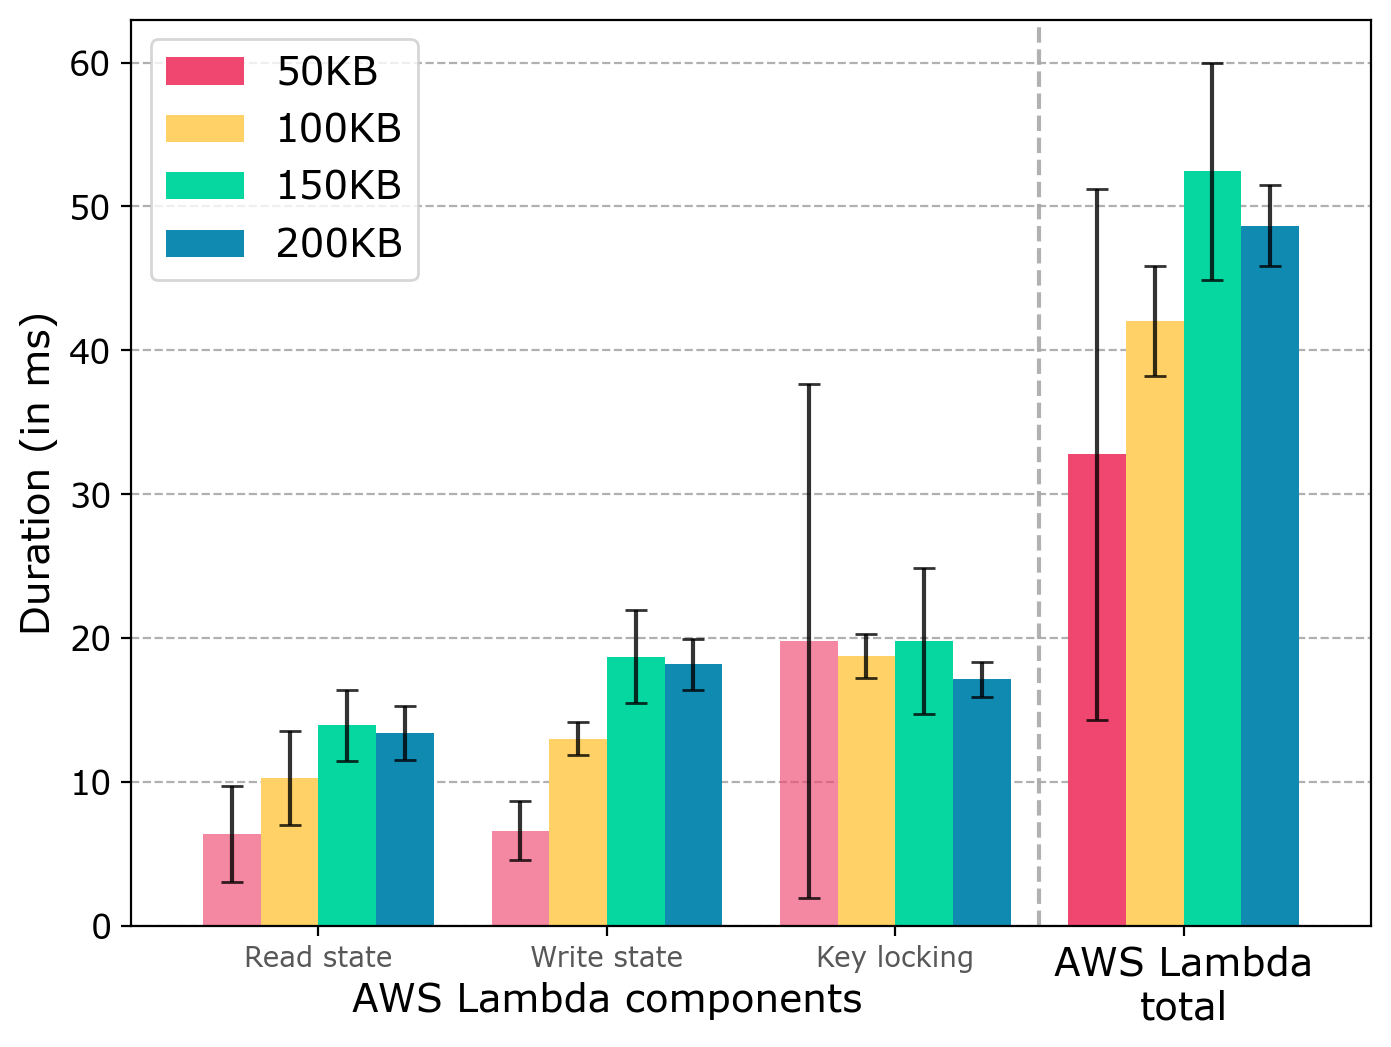

In [123]:
ax = overhead_mean.drop(["stateflow"], axis=0).plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=overhead_std.drop(["stateflow"], axis=0), rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
#ax.set_yscale('log')
for i in range(4, 7):
    #ax.get_children()[i].set_font_size(14)
    ax.get_children()[i].set_alpha(0.65)
        
ax.set_ylabel("Duration (in ms)", fontsize=14)
leg=plt.legend(loc=0, prop={"size": 14})
    
    
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Read state", "Write state", "Key locking", "AWS Lambda\ntotal"], fontsize=14)
#ax.set_yticks([0.1, 1, 10, 50, 100, 200])
plt.axvline(x=2.5, color="darkgray", linestyle="--", alpha=0.9)
for i, tick in enumerate(ax.xaxis.get_major_ticks()):
    if i > 2:
        continue
    tick.label.set_fontsize(10)
    tick.label.set_alpha(0.65)

for lh in leg.legendHandles: 
    lh.set_alpha(1)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0f'))
ax.text(1, -6, "AWS Lambda components", horizontalalignment='center', fontsize=14)
#ax.text(3, -5, "Total", horizontalalignment='center', fontsize=14)
plt.savefig("aws_single_invocation_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [124]:
rel_fiftykb_mean = fiftykb_data[["stateflow", "aws"]].mean()
total_fiftykb = rel_fiftykb_mean.sum()
rel_fiftykb = ((rel_fiftykb_mean / total_fiftykb) * 100).to_frame("50KB")

rel_hundredkb_mean = hundredkb_data[["stateflow", "aws"]].mean()
total_hundredkb = rel_hundredkb_mean.sum()
rel_hundredkb = ((rel_hundredkb_mean / total_hundredkb) * 100).to_frame("100KB")

rel_hundredfiftykb_mean = hundredfiftykb_data[["stateflow", "aws"]].mean()
total_hundredfiftykb = rel_hundredfiftykb_mean.sum()
rel_hundredfiftykb = ((rel_hundredfiftykb_mean / total_hundredfiftykb) * 100).to_frame("150KB")

rel_twohundredkb_mean = twohundredkb_data[["stateflow", "aws"]].mean()
total_twohundredkb = rel_twohundredkb_mean.sum()
rel_twohundredkb = ((rel_twohundredkb_mean / total_twohundredkb) * 100).to_frame("200KB")

rel_overhead = pd.concat([rel_fiftykb, rel_hundredkb, rel_hundredfiftykb, rel_twohundredkb], axis=1)
#ax = rel_overhead.transpose().plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], rot=0, stacked=True, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
print(rel_overhead)

                50KB      100KB      150KB      200KB
stateflow   0.650241   0.559108   0.484312   0.544944
aws        99.349759  99.440892  99.515688  99.455056


# Overhead experiment, various execution graph lengths, no interaction, AWS Lambda
Results are obtained via code commit: https://github.com/wzorgdrager/stateful_dataflows/commit/6d63d829efa1c309b159df9e5f7aa35f37f2f0ed

In [125]:
eg10_data = pd.read_csv("with_runtime/aws_lambda_eg_10.csv")
eg10_data = eg10_data[eg10_data["EVENT_SERIALIZATION_DURATION"] < eg10_data["EVENT_SERIALIZATION_DURATION"].quantile(0.95)] 

eg10_data["stateflow"] = eg10_data["ACTOR_CONSTRUCTION"] + eg10_data["ROUTING_DURATION"] + eg10_data["EVENT_SERIALIZATION_DURATION"] + eg10_data["STATE_SERIALIZATION_DURATION"] + eg10_data["EXECUTION_GRAPH_TRAVERSAL"]
eg10_data["aws"] = eg10_data["READ_STATE"] + eg10_data["KEY_LOCKING"] + eg10_data["WRITE_STATE"]

eg10_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,EXECUTION_GRAPH_TRAVERSAL,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,48.989474,48.989474,0.051922,0.193945,0.048956,0.121088,0.017208,19.222162,7.990563,10.879906,0.433119,38.092631
std,29.234377,29.234377,0.004375,0.005960,0.006261,0.004911,0.000715,2.401467,0.855222,0.773648,0.013232,2.701524
min,0.000000,0.000000,0.046697,0.183735,0.043594,0.114926,0.015937,17.584412,6.802220,9.723122,0.409744,34.721191
25%,23.500000,23.500000,0.049550,0.189979,0.046383,0.118371,0.016653,18.216778,7.336305,10.345478,0.424648,36.826074
50%,49.000000,49.000000,0.050852,0.193147,0.047385,0.120021,0.017104,18.637885,7.636953,10.677503,0.431406,37.622465
75%,73.500000,73.500000,0.052917,0.196842,0.048439,0.122106,0.017764,19.191020,8.721436,11.215747,0.438615,38.700400
max,99.000000,99.000000,0.078204,0.215207,0.082356,0.149396,0.019320,37.145120,10.938692,13.800634,0.479256,55.916203


In [126]:
eg100_data = pd.read_csv("with_runtime/aws_lambda_eg_100.csv")
eg100_data = eg100_data[eg100_data["EVENT_SERIALIZATION_DURATION"] < eg100_data["EVENT_SERIALIZATION_DURATION"].quantile(0.95)] 

eg100_data["stateflow"] = eg100_data["ACTOR_CONSTRUCTION"] + eg100_data["ROUTING_DURATION"] + eg100_data["EVENT_SERIALIZATION_DURATION"] + eg100_data["STATE_SERIALIZATION_DURATION"] + eg100_data["EXECUTION_GRAPH_TRAVERSAL"] 
eg100_data["aws"] = eg100_data["READ_STATE"] + eg100_data["KEY_LOCKING"] + eg100_data["WRITE_STATE"]

#eg100_data["stateflow"] = eg100_data[eg100_data["stateflow"] < eg100_data["stateflow"].quantile(0.95)]

eg100_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,EXECUTION_GRAPH_TRAVERSAL,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,49.221053,49.221053,0.056336,0.597311,0.050664,1.098584,0.015221,19.170198,8.248694,10.667586,1.818115,38.086479
std,29.322556,29.322556,0.004716,0.027305,0.007285,0.045474,0.001186,3.403767,1.737187,1.758482,0.060780,4.134519
min,0.000000,0.000000,0.049980,0.541391,0.045601,1.050957,0.013268,17.339200,6.873453,8.795013,1.722866,35.130776
25%,23.500000,23.500000,0.052960,0.580332,0.048056,1.073086,0.014641,18.195885,7.387033,10.188249,1.777352,36.220424
50%,49.000000,49.000000,0.055752,0.595185,0.049333,1.090918,0.015115,18.451759,7.701714,10.352571,1.811491,37.237041
75%,74.500000,74.500000,0.058820,0.617747,0.050284,1.107113,0.015549,18.989681,8.795142,10.676753,1.844703,38.273491
max,99.000000,99.000000,0.078217,0.663262,0.105720,1.373385,0.024942,42.208916,22.854628,26.531269,2.106022,60.472319


In [127]:
eg500_data = pd.read_csv("with_runtime/aws_lambda_eg_500.csv")
eg500_data = eg500_data[eg500_data["EVENT_SERIALIZATION_DURATION"] < eg500_data["EVENT_SERIALIZATION_DURATION"].quantile(0.95)] 
    
eg500_data["stateflow"] = eg500_data["ACTOR_CONSTRUCTION"] + eg500_data["ROUTING_DURATION"] + eg500_data["EVENT_SERIALIZATION_DURATION"] + eg500_data["STATE_SERIALIZATION_DURATION"] + eg100_data["STATE_SERIALIZATION_DURATION"] + eg500_data["EXECUTION_GRAPH_TRAVERSAL"] 
eg500_data["aws"] = eg500_data["READ_STATE"] + eg500_data["KEY_LOCKING"] + eg500_data["WRITE_STATE"]
#eg500_data["stateflow"] = eg500_data[eg500_data["stateflow"] < eg500_data["stateflow"].quantile(0.95)]

eg500_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,EXECUTION_GRAPH_TRAVERSAL,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,90.000000,95.000000
mean,49.947368,49.947368,0.075540,2.074676,0.057219,5.393377,0.015741,19.344902,8.344169,11.181384,7.676424,38.870455
std,28.561009,28.561009,0.008157,0.077244,0.003376,0.278183,0.001851,2.321067,2.847884,3.484870,0.297779,5.043490
min,0.000000,0.000000,0.058516,1.951322,0.052527,5.069285,0.013611,17.636259,6.780840,9.238064,7.285935,34.901847
25%,26.500000,26.500000,0.069080,2.016944,0.055333,5.266618,0.014898,18.449396,7.346471,9.968745,7.525903,36.563886
50%,50.000000,50.000000,0.075455,2.056972,0.056839,5.342114,0.015521,18.724451,7.783624,10.233532,7.612042,37.232798
75%,73.500000,73.500000,0.080401,2.136095,0.058179,5.443994,0.015971,19.268317,8.307770,10.892663,7.763794,38.800995
max,99.000000,99.000000,0.099476,2.268670,0.074624,7.631772,0.026365,36.307168,28.334091,36.444580,9.863780,63.309837


In [128]:
eg1000_data = pd.read_csv("with_runtime/aws_lambda_eg_1000.csv")
eg1000_data = eg1000_data[eg1000_data["EVENT_SERIALIZATION_DURATION"] < eg1000_data["EVENT_SERIALIZATION_DURATION"].quantile(0.95)]
    
eg1000_data["stateflow"] = eg1000_data["ACTOR_CONSTRUCTION"] + eg1000_data["ROUTING_DURATION"] + eg1000_data["EVENT_SERIALIZATION_DURATION"] + eg1000_data["STATE_SERIALIZATION_DURATION"] + + eg500_data["STATE_SERIALIZATION_DURATION"] + eg100_data["STATE_SERIALIZATION_DURATION"] + eg1000_data["EXECUTION_GRAPH_TRAVERSAL"] 
eg1000_data["aws"] = eg1000_data["READ_STATE"] + eg1000_data["KEY_LOCKING"] + eg1000_data["WRITE_STATE"]
#eg1000_data["stateflow"] = eg1000_data[eg1000_data["stateflow"] < eg1000_data["stateflow"].quantile(0.95)]
    
eg1000_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,EXECUTION_GRAPH_TRAVERSAL,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,85.000000,95.000000
mean,49.747368,49.747368,0.952474,3.879104,0.070466,12.836804,0.015753,21.800809,8.684593,12.136627,18.037262,42.622029
std,28.959608,28.959608,3.661642,0.344034,0.028755,3.631651,0.004182,4.755726,2.180086,3.755361,4.880993,6.554492
min,0.000000,0.000000,0.071404,3.468313,0.051991,10.201268,0.013659,17.717483,6.975551,8.876399,14.116106,35.186984
25%,25.500000,25.500000,0.087235,3.634771,0.056125,10.398984,0.014698,18.538555,7.798414,9.503023,14.612501,37.442355
50%,50.000000,50.000000,0.093422,3.771674,0.058526,10.592167,0.014972,20.522206,8.168961,10.227164,15.169318,41.564462
75%,74.500000,74.500000,0.116468,4.038192,0.070192,14.635418,0.015488,23.386633,9.020953,13.516364,22.501628,45.849408
max,99.000000,99.000000,27.925512,5.788931,0.179406,22.673830,0.050246,50.919047,24.648128,31.273583,42.233431,72.271486


In [129]:
eg10_mean = eg10_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].mean().to_frame(name="10 nodes")
eg100_mean = eg100_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].mean().to_frame(name="100 nodes")
eg500_mean = eg500_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].mean().to_frame(name="500 nodes")
eg1000_mean = eg1000_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].mean().to_frame(name="1000 nodes")

eg10_std = eg10_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].std().to_frame(name="10 nodes")
eg100_std = eg100_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].std().to_frame(name="100 nodes")
eg500_std = eg500_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].std().to_frame(name="500 nodes")
eg1000_std = eg1000_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].std().to_frame(name="1000 nodes")


eg_mean = pd.concat([eg10_mean, eg100_mean, eg500_mean, eg1000_mean], axis=1)
eg_std = pd.concat([eg10_std, eg100_std, eg500_std, eg1000_std], axis=1)
eg_aws_mean = eg_mean.loc[["stateflow", "aws"]].rename({"stateflow": "stateflow_aws"})
eg_aws_std = eg_std.loc[["stateflow", "aws"]].rename({"stateflow": "stateflow_aws"})
print(eg_aws_mean)
print(eg_aws_std)
print(eg_mean)
print(eg_std)

                10 nodes  100 nodes  500 nodes  1000 nodes
stateflow_aws   0.433119   1.818115   7.676424   18.037262
aws            38.092631  38.086479  38.870455   42.622029
               10 nodes  100 nodes  500 nodes  1000 nodes
stateflow_aws  0.013232   0.060780   0.297779    4.880993
aws            2.701524   4.134519   5.043490    6.554492
              10 nodes  100 nodes  500 nodes  1000 nodes
stateflow     0.433119   1.818115   7.676424   18.037262
KEY_LOCKING  19.222162  19.170198  19.344902   21.800809
READ_STATE    7.990563   8.248694   8.344169    8.684593
WRITE_STATE  10.879906  10.667586  11.181384   12.136627
aws          38.092631  38.086479  38.870455   42.622029
             10 nodes  100 nodes  500 nodes  1000 nodes
stateflow    0.013232   0.060780   0.297779    4.880993
KEY_LOCKING  2.401467   3.403767   2.321067    4.755726
READ_STATE   0.855222   1.737187   2.847884    2.180086
WRITE_STATE  0.773648   1.758482   3.484870    3.755361
aws          2.701524   4.1

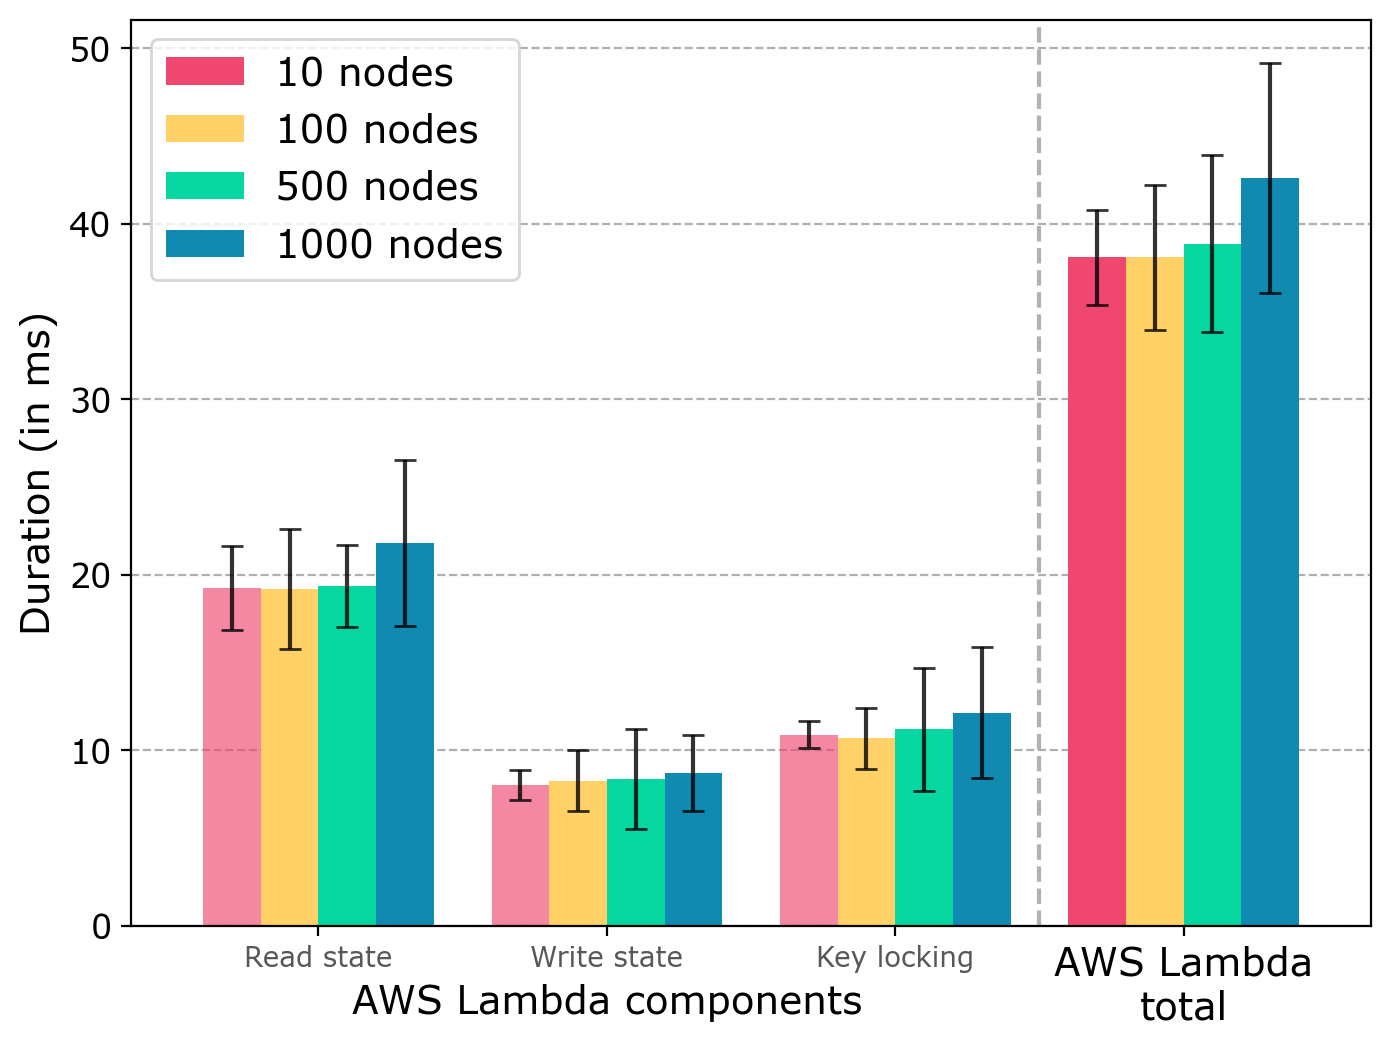

In [130]:
ax = eg_mean.drop(["stateflow"], axis=0).plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=eg_std.drop(["stateflow"], axis=0), rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
#ax.set_yscale('log')
for i in range(4, 7):
    #ax.get_children()[i].set_font_size(14)
    ax.get_children()[i].set_alpha(0.65)
        
ax.set_ylabel("Duration (in ms)", fontsize=14)
leg=plt.legend(loc=0, prop={"size": 14})
    
    
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Read state", "Write state", "Key locking", "AWS Lambda\ntotal"], fontsize=14)
#ax.set_yticks([0.1, 1, 10, 50, 100, 200])
plt.axvline(x=2.5, color="darkgray", linestyle="--", alpha=0.9)
for i, tick in enumerate(ax.xaxis.get_major_ticks()):
    if i > 2:
        continue
    tick.label.set_fontsize(10)
    tick.label.set_alpha(0.65)

for lh in leg.legendHandles: 
    lh.set_alpha(1)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0f'))
ax.text(1, -5, "AWS Lambda components", horizontalalignment='center', fontsize=14)
#ax.text(3, -5, "Total", horizontalalignment='center', fontsize=14)
plt.savefig("aws_eg_length_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [131]:
rel_eg10_mean = eg10_data[["stateflow", "aws"]].mean()
total_eg10 = rel_eg10_mean.sum()
rel_eg10 = ((rel_eg10_mean / total_eg10) * 100).to_frame("50 nodes")

rel_eg100_mean = eg100_data[["stateflow", "aws"]].mean()
total_eg100 = rel_eg100_mean.sum()
rel_eg100 = ((rel_eg100_mean / total_eg100) * 100).to_frame("100 nodes")

rel_eg500_mean = eg500_data[["stateflow", "aws"]].mean()
total_eg500 = rel_eg500_mean.sum()
rel_eg500 = ((rel_eg500_mean / total_eg500) * 100).to_frame("150 nodes")

rel_eg1000_mean = eg1000_data[["stateflow", "aws"]].mean()
total_eg1000 = rel_eg1000_mean.sum()
rel_eg1000 = ((rel_eg1000_mean / total_eg1000) * 100).to_frame("1000 nodes")

rel_eg = pd.concat([rel_eg10, rel_eg100, rel_eg500, rel_eg1000], axis=1)
#ax = rel_overhead.transpose().plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], rot=0, stacked=True, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
print(rel_eg)

            50 nodes  100 nodes  150 nodes  1000 nodes
stateflow   1.124231   4.556154  16.491812   29.735366
aws        98.875769  95.443846  83.508188   70.264634


# Overhead experiment, fixed execution graph lengths, various interaction, AWS Lambda
Results are obtained via code commit: https://github.com/wzorgdrager/stateful_dataflows/commit/9ab4e2ec1ce0884b47b8517a9343227565f3585f

In [132]:
in5_data = pd.read_csv("with_runtime/aws_lambda_inter_5.csv")
in5_data = in5_data[in5_data["EVENT_SERIALIZATION_DURATION"] < in5_data["EVENT_SERIALIZATION_DURATION"].quantile(0.95)] 

in5_data["stateflow"] = in5_data["ACTOR_CONSTRUCTION"] + in5_data["ROUTING_DURATION"] + in5_data["EVENT_SERIALIZATION_DURATION"] + in5_data["STATE_SERIALIZATION_DURATION"] + in5_data["EXECUTION_GRAPH_TRAVERSAL"]
in5_data["aws"] = in5_data["READ_STATE"] + in5_data["KEY_LOCKING"] + in5_data["WRITE_STATE"]

in5_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,EXECUTION_GRAPH_TRAVERSAL,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,50.894737,50.894737,0.567298,0.209491,0.369107,0.854828,0.167266,210.696693,70.041969,77.760484,2.167991,358.499146
std,28.874443,28.874443,0.032888,0.010066,0.025171,0.040020,0.010610,35.115268,10.018637,7.437057,0.071428,36.820804
min,0.000000,0.000000,0.510264,0.195058,0.335652,0.805847,0.156197,194.639476,62.523995,71.988355,2.037531,333.577900
25%,25.500000,25.500000,0.549319,0.202615,0.351068,0.829862,0.161407,201.862214,65.114166,74.293057,2.111850,343.165161
50%,52.000000,52.000000,0.559000,0.206418,0.362388,0.846728,0.163498,204.226187,67.105693,75.481475,2.153325,350.203119
75%,75.500000,75.500000,0.574973,0.213706,0.377908,0.868340,0.169019,209.410629,69.665736,77.424190,2.198630,362.707983
max,99.000000,99.000000,0.700394,0.241536,0.467301,1.050971,0.221299,535.135989,138.149098,118.530691,2.396564,678.575855


In [133]:
in10_data = pd.read_csv("with_runtime/aws_lambda_inter_10.csv")
in10_data = in10_data[in10_data["EVENT_SERIALIZATION_DURATION"] < in10_data["EVENT_SERIALIZATION_DURATION"].quantile(0.95)] 

in10_data["stateflow"] = in10_data["ACTOR_CONSTRUCTION"] + in10_data["ROUTING_DURATION"] + in10_data["EVENT_SERIALIZATION_DURATION"] + in10_data["STATE_SERIALIZATION_DURATION"] + in10_data["EXECUTION_GRAPH_TRAVERSAL"]
in10_data["aws"] = in10_data["READ_STATE"] + in10_data["KEY_LOCKING"] + in10_data["WRITE_STATE"]

in10_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,EXECUTION_GRAPH_TRAVERSAL,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,49.021053,49.021053,1.098330,0.226701,0.685506,1.668671,0.327771,396.741294,131.744084,150.377024,4.006979,678.862403
std,29.117875,29.117875,0.057878,0.014510,0.033223,0.066063,0.026455,14.380577,10.187125,12.818329,0.128553,28.200612
min,0.000000,0.000000,1.003451,0.210782,0.628058,1.556125,0.304517,369.582406,122.453710,138.445904,3.755554,635.047209
25%,24.500000,24.500000,1.064611,0.217017,0.665584,1.625436,0.314270,388.397230,126.627706,144.641828,3.930606,661.658134
50%,48.000000,48.000000,1.084880,0.221281,0.677458,1.650313,0.320130,393.784584,128.479952,147.276957,3.990033,673.239861
75%,74.500000,74.500000,1.118214,0.231976,0.703229,1.700705,0.331764,401.798943,134.362574,151.685793,4.062775,687.490137
max,99.000000,99.000000,1.300972,0.271001,0.792851,1.957332,0.476542,452.611670,201.060934,232.403585,4.495869,845.967076


In [134]:
in15_data = pd.read_csv("with_runtime/aws_lambda_inter_15.csv")
in15_data = in15_data[in15_data["EVENT_SERIALIZATION_DURATION"] < in15_data["EVENT_SERIALIZATION_DURATION"].quantile(0.95)] 

in15_data["stateflow"] = in15_data["ACTOR_CONSTRUCTION"] + in15_data["ROUTING_DURATION"] + in15_data["EVENT_SERIALIZATION_DURATION"] + in15_data["STATE_SERIALIZATION_DURATION"] + in15_data["EXECUTION_GRAPH_TRAVERSAL"]
in15_data["aws"] = in15_data["READ_STATE"] + in15_data["KEY_LOCKING"] + in15_data["WRITE_STATE"]

in15_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,EXECUTION_GRAPH_TRAVERSAL,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,48.894737,48.894737,1.591349,0.235020,0.996018,2.364440,0.476210,552.199317,196.771841,223.669715,5.663037,972.640873
std,29.178276,29.178276,0.069799,0.008913,0.042160,0.063373,0.038594,19.805447,12.650790,12.973049,0.160960,32.422915
min,0.000000,0.000000,1.446349,0.221337,0.918225,2.258105,0.444177,518.994603,171.850647,200.273098,5.371320,895.169165
25%,24.500000,24.500000,1.550189,0.228658,0.968313,2.313042,0.460819,538.101407,191.095391,216.446475,5.548994,957.073292
50%,48.000000,48.000000,1.584526,0.232064,0.994672,2.355548,0.469092,548.970812,196.108040,223.576018,5.642154,972.086947
75%,74.500000,74.500000,1.618589,0.239824,1.019257,2.402366,0.481177,563.035083,200.554357,229.293801,5.751346,989.203521
max,99.000000,99.000000,1.817539,0.257527,1.219403,2.559134,0.805897,634.444811,239.386175,264.237448,6.280975,1085.612317


In [135]:
in20_data = pd.read_csv("with_runtime/aws_lambda_inter_20.csv")
in20_data = in20_data[in20_data["EVENT_SERIALIZATION_DURATION"] < in20_data["EVENT_SERIALIZATION_DURATION"].quantile(0.95)] 

in20_data["stateflow"] = in20_data["ACTOR_CONSTRUCTION"] + in20_data["ROUTING_DURATION"] + in20_data["EVENT_SERIALIZATION_DURATION"] + in20_data["STATE_SERIALIZATION_DURATION"] + in20_data["EXECUTION_GRAPH_TRAVERSAL"]
in20_data["aws"] = in20_data["READ_STATE"] + in20_data["KEY_LOCKING"] + in20_data["WRITE_STATE"]

in20_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,EXECUTION_GRAPH_TRAVERSAL,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,48.757895,48.757895,2.137679,0.248630,1.292837,3.101023,0.625055,737.827106,267.598733,305.114921,7.405224,1310.540761
std,29.079025,29.079025,0.079160,0.010587,0.045691,0.079793,0.024595,33.601744,13.356919,18.003220,0.169623,44.531751
min,0.000000,0.000000,2.013198,0.234185,1.208226,2.923769,0.587552,683.997878,250.652454,283.761308,7.047267,1231.367645
25%,23.500000,23.500000,2.078990,0.241964,1.258104,3.051560,0.606588,716.211053,258.151829,293.031310,7.298380,1279.311799
50%,48.000000,48.000000,2.118528,0.245914,1.287536,3.085288,0.619911,732.819785,263.576380,298.577030,7.373204,1303.019667
75%,74.500000,74.500000,2.201087,0.253066,1.320416,3.134296,0.638451,752.381681,272.287897,313.521916,7.527998,1333.309676
max,99.000000,99.000000,2.343054,0.280746,1.454983,3.367811,0.729332,931.657177,313.221850,361.876934,7.806882,1497.510741


In [136]:
in5_mean = in5_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].mean().to_frame(name="5 interactions")
in10_mean = in10_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].mean().to_frame(name="10 interactions")
in15_mean = in15_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].mean().to_frame(name="15 interactions")
in20_mean = in20_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].mean().to_frame(name="20 interactions")

in5_std = in5_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].std().to_frame(name="5 interactions")
in10_std = in10_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].std().to_frame(name="10 interactions")
in15_std = in15_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].std().to_frame(name="15 interactions")
in20_std = in20_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE", "aws"]].std().to_frame(name="20 interactions")


in_mean = pd.concat([in5_mean, in10_mean, in15_mean, in20_mean], axis=1)
in_std = pd.concat([in5_std, in10_std, in15_std, in20_std], axis=1)
in_aws_mean = in_mean.loc[["stateflow", "aws"]].rename({"stateflow": "stateflow_aws"})
in_aws_std = in_std.loc[["stateflow", "aws"]].rename({"stateflow": "stateflow_aws"})
print(in_aws_mean)
print(in_aws_std)
print(in_mean)
print(in_std)

               5 interactions  10 interactions  15 interactions  \
stateflow_aws        2.167991         4.006979         5.663037   
aws                358.499146       678.862403       972.640873   

               20 interactions  
stateflow_aws         7.405224  
aws                1310.540761  
               5 interactions  10 interactions  15 interactions  \
stateflow_aws        0.071428         0.128553         0.160960   
aws                 36.820804        28.200612        32.422915   

               20 interactions  
stateflow_aws         0.169623  
aws                  44.531751  
             5 interactions  10 interactions  15 interactions  20 interactions
stateflow          2.167991         4.006979         5.663037         7.405224
KEY_LOCKING      210.696693       396.741294       552.199317       737.827106
READ_STATE        70.041969       131.744084       196.771841       267.598733
WRITE_STATE       77.760484       150.377024       223.669715       305.114921
aws

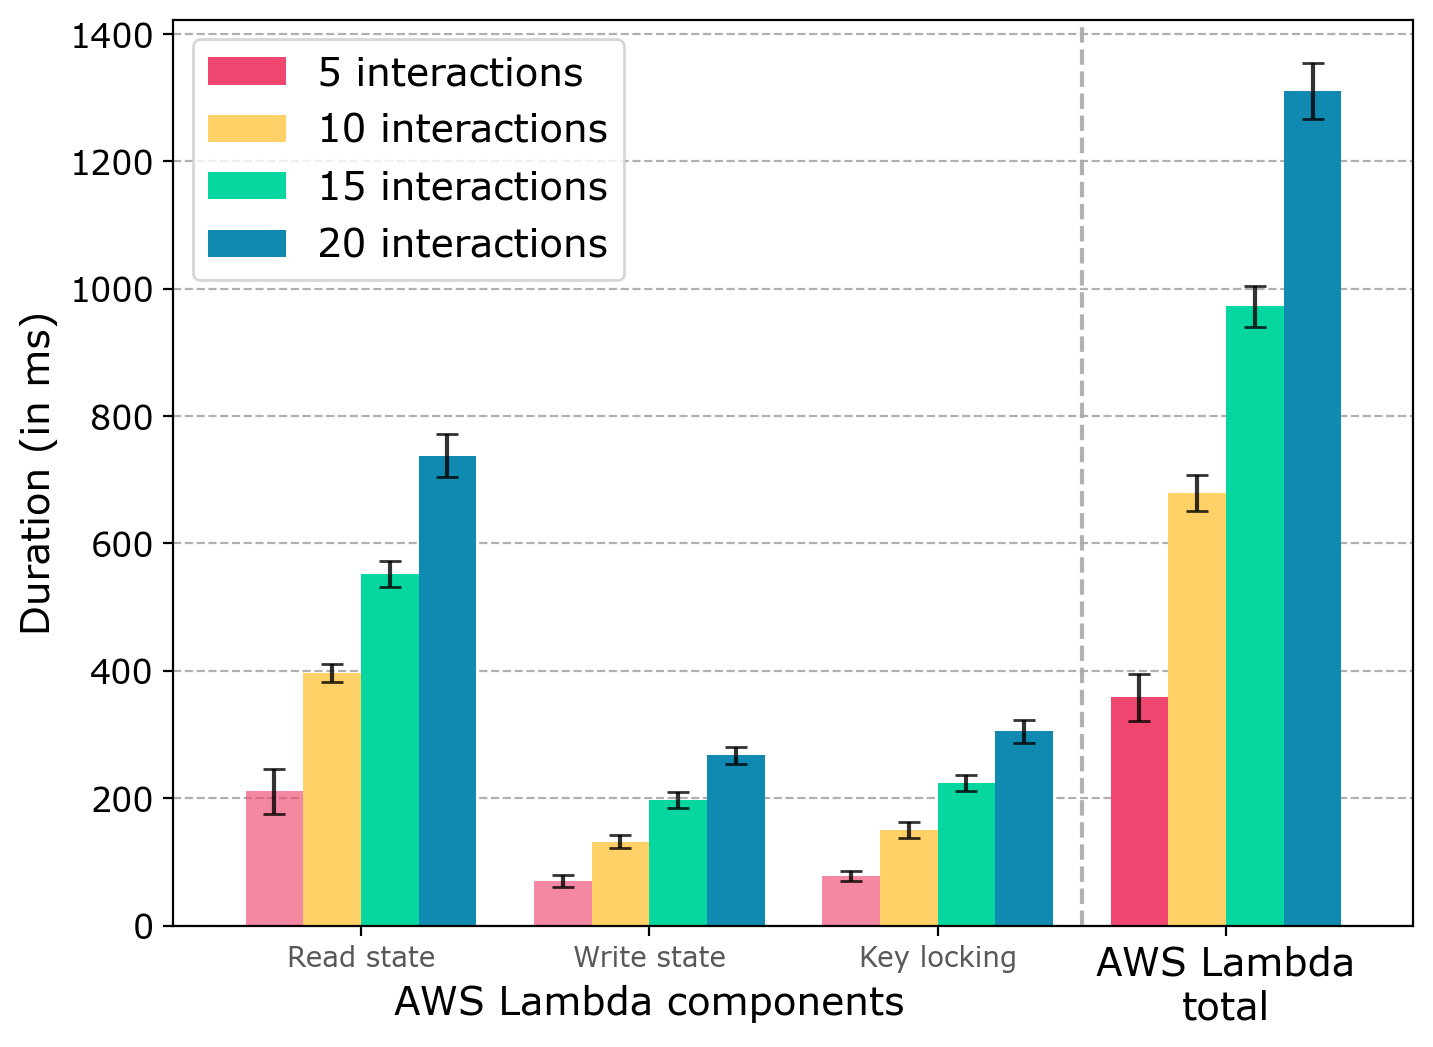

In [137]:
ax = in_mean.drop(["stateflow"], axis=0).plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=in_std.drop(["stateflow"], axis=0), rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
#ax.set_yscale('log')
for i in range(4, 7):
    #ax.get_children()[i].set_font_size(14)
    ax.get_children()[i].set_alpha(0.65)
        
ax.set_ylabel("Duration (in ms)", fontsize=14)
leg=plt.legend(loc=0, prop={"size": 14})
    
    
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Read state", "Write state", "Key locking", "AWS Lambda\ntotal"], fontsize=14)
#ax.set_yticks([0.1, 1, 10, 50, 100, 200])
plt.axvline(x=2.5, color="darkgray", linestyle="--", alpha=0.9)
for i, tick in enumerate(ax.xaxis.get_major_ticks()):
    if i > 2:
        continue
    tick.label.set_fontsize(10)
    tick.label.set_alpha(0.65)

for lh in leg.legendHandles: 
    lh.set_alpha(1)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0f'))
ax.text(1, -140, "AWS Lambda components", horizontalalignment='center', fontsize=14)
#ax.text(3, -5, "Total", horizontalalignment='center', fontsize=14)
plt.savefig("aws_in_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [138]:
rel_in5_mean = in5_data[["stateflow", "aws"]].mean()
total_in5 = rel_in5_mean.sum()
rel_in5 = ((rel_in5_mean / total_in5) * 100).to_frame("50 nodes")

rel_in10_mean = in10_data[["stateflow", "aws"]].mean()
total_in10 = rel_in10_mean.sum()
rel_in10 = ((rel_in10_mean / total_in10) * 100).to_frame("100 nodes")

rel_in15_mean = in15_data[["stateflow", "aws"]].mean()
total_in15 = rel_in15_mean.sum()
rel_in15 = ((rel_in15_mean / total_in15) * 100).to_frame("150 nodes")

rel_in20_mean = in20_data[["stateflow", "aws"]].mean()
total_in20 = rel_in20_mean.sum()
rel_in20 = ((rel_in20_mean / total_in20) * 100).to_frame("1000 nodes")

rel_in = pd.concat([rel_in5, rel_in10, rel_in15, rel_in20], axis=1)
#ax = rel_overhead.transpose().plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], rot=0, stacked=True, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
print(rel_in)

            50 nodes  100 nodes  150 nodes  1000 nodes
stateflow   0.601106   0.586786   0.578863    0.561876
aws        99.398894  99.413214  99.421137   99.438124


# Overhead experiment, with runtime, Statefun, various state sizes
For a single trip to Kafka we computed an average of 7.180430976191201ms (10 000 repetitions, no batching).
Commit code: https://github.com/wzorgdrager/stateful_dataflows/commit/c23840719ae9dc8eff4e44e83d4c93f30cd72f55

In [139]:
KAFKA_LATENCY = 7.180430976191201
KAFKA_ROUNDTRIP = 2 * KAFKA_LATENCY

In [140]:
fiftykb_data = pd.read_csv("with_runtime/statefun_50kb.csv")

columns = ["STATEFUN", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    fiftykb_data = fiftykb_data[fiftykb_data[column] < fiftykb_data[column].quantile(0.95)] 

fiftykb_data["stateflow"] = fiftykb_data["ACTOR_CONSTRUCTOR"] + fiftykb_data["ROUTING_DURATION"] + fiftykb_data["EVENT_SERIALIZATION_DURATION"] + fiftykb_data["STATE_SERIALIZATION_DURATION"] 
fiftykb_data["statefun"] = fiftykb_data["STATEFUN"] - KAFKA_ROUNDTRIP

fiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,STATEFUN,stateflow,statefun
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,48.888889,48.888889,0.080880,0.148412,0.010461,0.020443,69.144444,0.260195,54.783582
std,28.844973,28.844973,0.030054,0.050498,0.003384,0.007507,6.429499,0.090226,6.429499
min,1.000000,1.000000,0.024440,0.051246,0.003927,0.006865,56.000000,0.087306,41.639138
25%,25.250000,25.250000,0.055400,0.106211,0.007422,0.014088,65.000000,0.182036,50.639138
50%,47.500000,47.500000,0.099109,0.180889,0.012359,0.023870,68.000000,0.317532,53.639138
75%,72.750000,72.750000,0.101219,0.184246,0.013061,0.024872,73.750000,0.322793,59.389138
max,99.000000,99.000000,0.136909,0.217143,0.014085,0.045864,82.000000,0.374258,67.639138


In [141]:
hundredkb_data = pd.read_csv("with_runtime/statefun_100kb.csv")
columns = ["STATEFUN", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    hundredkb_data = hundredkb_data[hundredkb_data[column] < hundredkb_data[column].quantile(0.95)] 
    
hundredkb_data["stateflow"] = hundredkb_data["ACTOR_CONSTRUCTOR"] + hundredkb_data["ROUTING_DURATION"] + hundredkb_data["EVENT_SERIALIZATION_DURATION"] + hundredkb_data["STATE_SERIALIZATION_DURATION"] 
hundredkb_data["statefun"] = hundredkb_data["STATEFUN"]- KAFKA_ROUNDTRIP

hundredkb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,STATEFUN,stateflow,statefun
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,49.344444,49.344444,0.092912,0.125373,0.009328,0.018782,72.288889,0.246396,57.928027
std,28.853431,28.853431,0.044246,0.057152,0.004096,0.010418,7.991912,0.114452,7.991912
min,1.000000,1.000000,0.037739,0.052777,0.003877,0.007438,58.000000,0.102706,43.639138
25%,25.250000,25.250000,0.048180,0.067490,0.005207,0.009450,66.250000,0.130111,51.889138
50%,49.500000,49.500000,0.076811,0.111594,0.008129,0.016898,71.500000,0.210717,57.139138
75%,73.750000,73.750000,0.141369,0.189268,0.013619,0.026781,79.000000,0.371007,64.639138
max,99.000000,99.000000,0.170397,0.198663,0.015951,0.061484,87.000000,0.420000,72.639138


In [142]:
hundredfiftykb_data = pd.read_csv("with_runtime/statefun_150kb.csv")

columns = ["STATEFUN", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    hundredfiftykb_data = hundredfiftykb_data[hundredfiftykb_data[column] < hundredfiftykb_data[column].quantile(0.95)] 
    
hundredfiftykb_data["stateflow"] = hundredfiftykb_data["ACTOR_CONSTRUCTOR"] + hundredfiftykb_data["ROUTING_DURATION"] + hundredfiftykb_data["EVENT_SERIALIZATION_DURATION"] + hundredfiftykb_data["STATE_SERIALIZATION_DURATION"] 
hundredfiftykb_data["statefun"] = hundredfiftykb_data["STATEFUN"]- KAFKA_ROUNDTRIP
hundredfiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,STATEFUN,stateflow,statefun
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,48.988764,48.988764,0.099250,0.106869,0.008480,0.015645,74.483146,0.230245,60.122284
std,28.681042,28.681042,0.050631,0.050583,0.003956,0.007852,10.072591,0.112030,10.072591
min,1.000000,1.000000,0.046244,0.051661,0.004006,0.007583,31.000000,0.110481,16.639138
25%,25.000000,25.000000,0.054818,0.064075,0.005167,0.008936,70.000000,0.134407,55.639138
50%,49.000000,49.000000,0.082360,0.087687,0.007205,0.012865,77.000000,0.191131,62.639138
75%,73.000000,73.000000,0.124005,0.143725,0.012638,0.021497,82.000000,0.288629,67.639138
max,98.000000,98.000000,0.204870,0.200782,0.018445,0.045661,88.000000,0.453124,73.639138


In [143]:
twohundredkb_data = pd.read_csv("with_runtime/statefun_200kb.csv")

columns = ["STATEFUN", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    twohundredkb_data = twohundredkb_data[twohundredkb_data[column] < twohundredkb_data[column].quantile(0.95)] 
    
    
twohundredkb_data["stateflow"] = twohundredkb_data["ACTOR_CONSTRUCTOR"] + twohundredkb_data["ROUTING_DURATION"] + twohundredkb_data["EVENT_SERIALIZATION_DURATION"] + twohundredkb_data["STATE_SERIALIZATION_DURATION"] 
twohundredkb_data["statefun"] = twohundredkb_data["STATEFUN"] - KAFKA_ROUNDTRIP
hundredfiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,STATEFUN,stateflow,statefun
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,48.988764,48.988764,0.099250,0.106869,0.008480,0.015645,74.483146,0.230245,60.122284
std,28.681042,28.681042,0.050631,0.050583,0.003956,0.007852,10.072591,0.112030,10.072591
min,1.000000,1.000000,0.046244,0.051661,0.004006,0.007583,31.000000,0.110481,16.639138
25%,25.000000,25.000000,0.054818,0.064075,0.005167,0.008936,70.000000,0.134407,55.639138
50%,49.000000,49.000000,0.082360,0.087687,0.007205,0.012865,77.000000,0.191131,62.639138
75%,73.000000,73.000000,0.124005,0.143725,0.012638,0.021497,82.000000,0.288629,67.639138
max,98.000000,98.000000,0.204870,0.200782,0.018445,0.045661,88.000000,0.453124,73.639138


In [144]:
fiftykb_mean = fiftykb_data[["stateflow", "statefun"]].mean().to_frame(name="50KB")
hundredkb_mean = hundredkb_data[["stateflow", "statefun"]].mean().to_frame(name="100KB")
hundredfiftykb_mean = hundredfiftykb_data[["stateflow", "statefun"]].mean().to_frame(name="150KB")
twohundredkb_mean = twohundredkb_data[["stateflow", "statefun"]].mean().to_frame(name="200KB")

fiftykb_std = fiftykb_data[["stateflow", "statefun"]].std().to_frame(name="50KB")
hundredkb_std = hundredkb_data[["stateflow", "statefun"]].std().to_frame(name="100KB")
hundredfiftykb_std = hundredfiftykb_data[["stateflow", "statefun"]].std().to_frame(name="150KB")
twohundredkb_std = twohundredkb_data[["stateflow", "statefun"]].std().to_frame(name="200KB")


overhead_mean = pd.concat([fiftykb_mean, hundredkb_mean, hundredfiftykb_mean, twohundredkb_mean], axis=1)
overhead_std = pd.concat([fiftykb_std, hundredkb_std, hundredfiftykb_std, twohundredkb_std], axis=1)
state_statefun_mean = overhead_mean.loc[["stateflow", "statefun"]].rename({"stateflow": "stateflow_statefun"})
state_statefun_std = overhead_std.loc[["stateflow", "statefun"]].rename({"stateflow": "stateflow_statefun"})
print(state_statefun_mean)
print(state_statefun_std)
print(overhead_mean)
print(overhead_std)

                         50KB      100KB      150KB      200KB
stateflow_statefun   0.260195   0.246396   0.230245   0.385553
statefun            54.783582  57.928027  60.122284  55.957320
                        50KB     100KB      150KB     200KB
stateflow_statefun  0.090226  0.114452   0.112030  0.125527
statefun            6.429499  7.991912  10.072591  7.811788
                50KB      100KB      150KB      200KB
stateflow   0.260195   0.246396   0.230245   0.385553
statefun   54.783582  57.928027  60.122284  55.957320
               50KB     100KB      150KB     200KB
stateflow  0.090226  0.114452   0.112030  0.125527
statefun   6.429499  7.991912  10.072591  7.811788


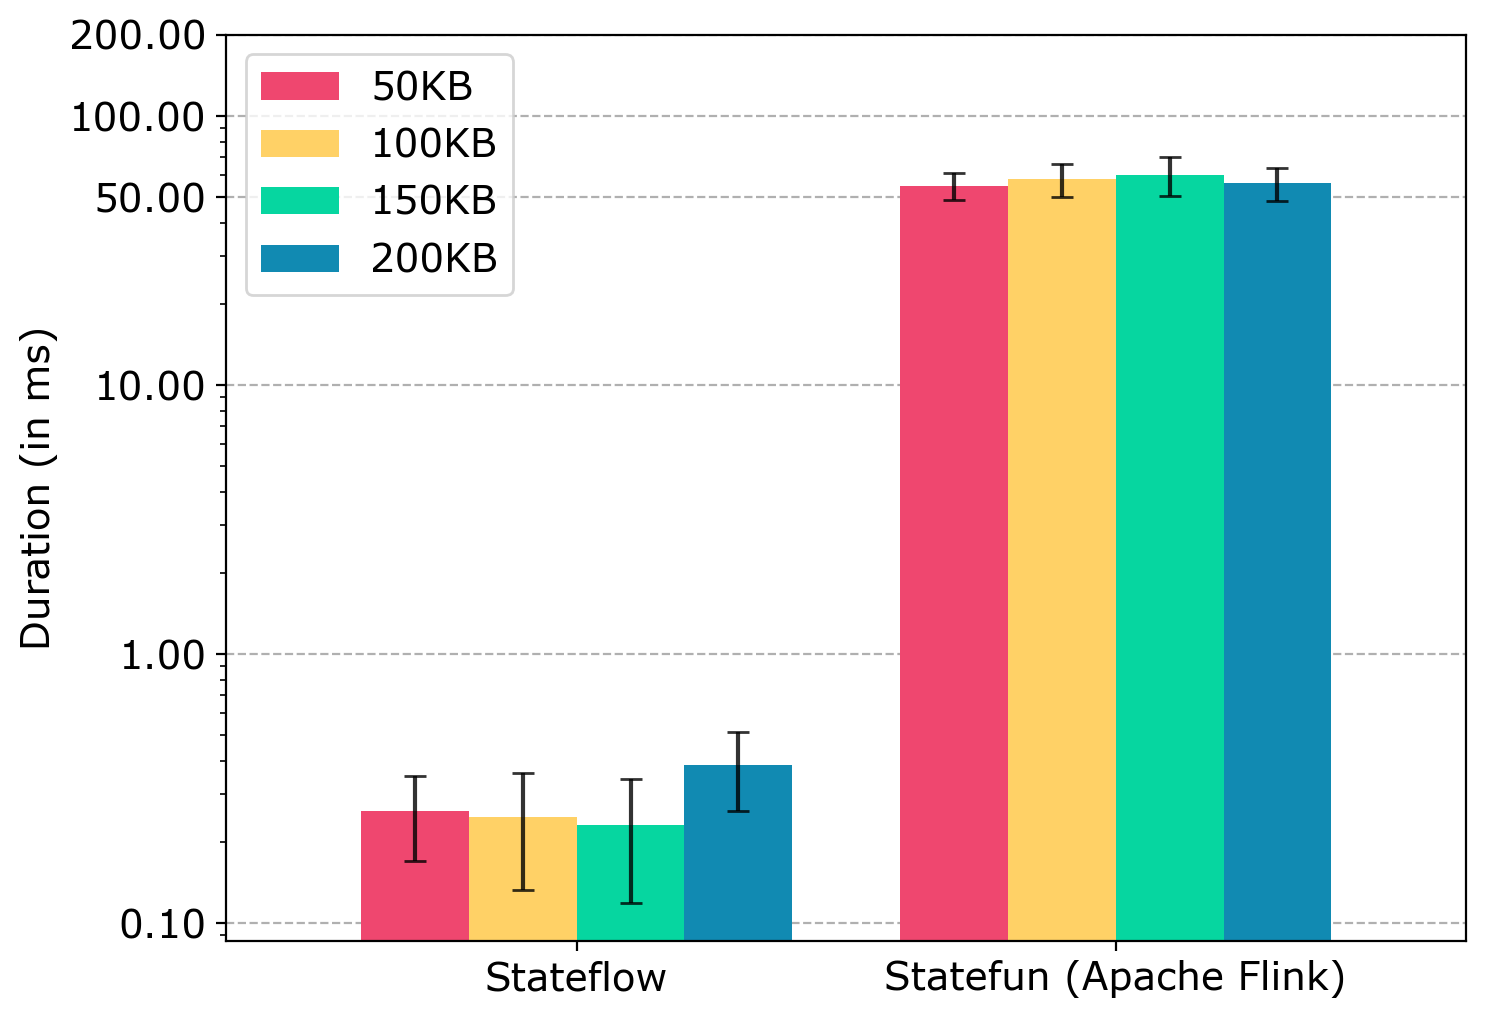

In [145]:
ax = overhead_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=overhead_std, rot=0, fontsize=14, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
plt.legend(loc=0, prop={"size": 14})
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Stateflow", "Statefun (Apache Flink)"], fontsize=14)
ax.set_yticks([0.1, 1, 10, 50, 100, 200])
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("statefun_single_invocation_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [146]:
rel_fiftykb_mean = fiftykb_data[["stateflow", "statefun"]].mean()
total_fiftykb = rel_fiftykb_mean.sum()
rel_fiftykb = ((rel_fiftykb_mean / total_fiftykb) * 100).to_frame("50KB")

rel_hundredkb_mean = hundredkb_data[["stateflow", "statefun"]].mean()
total_hundredkb = rel_hundredkb_mean.sum()
rel_hundredkb = ((rel_hundredkb_mean / total_hundredkb) * 100).to_frame("100KB")

rel_hundredfiftykb_mean = hundredfiftykb_data[["stateflow", "statefun"]].mean()
total_hundredfiftykb = rel_hundredfiftykb_mean.sum()
rel_hundredfiftykb = ((rel_hundredfiftykb_mean / total_hundredfiftykb) * 100).to_frame("150KB")

rel_twohundredkb_mean = twohundredkb_data[["stateflow", "statefun"]].mean()
total_twohundredkb = rel_twohundredkb_mean.sum()
rel_twohundredkb = ((rel_twohundredkb_mean / total_twohundredkb) * 100).to_frame("200KB")

rel_overhead = pd.concat([rel_fiftykb, rel_hundredkb, rel_hundredfiftykb, rel_twohundredkb], axis=1)
#ax = rel_overhead.transpose().plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], rot=0, stacked=True, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
print(rel_overhead)

                50KB      100KB      150KB      200KB
stateflow   0.472705   0.423547   0.381499   0.684298
statefun   99.527295  99.576453  99.618501  99.315702


# Overhead experiment, with runtime, Statefun, various execution graph lengths, no interaction
For a single trip to Kafka we computed an average of 7.180430976191201ms (10 000 repetitions, no batching).
Commit code: https://github.com/wzorgdrager/stateful_dataflows/commit/a8af3575b9da5b345a76b7937aa14131e7905bbb

In [147]:
KAFKA_LATENCY = 7.180430976191201
KAFKA_ROUNDTRIP = 2 * KAFKA_LATENCY

In [148]:
eg10_data = pd.read_csv("with_runtime/statefun_10eg.csv")
columns = ["STATEFUN", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    eg10_data = eg10_data[eg10_data[column] < eg10_data[column].quantile(0.95)] 
    
eg10_data["stateflow"] = eg10_data["ACTOR_CONSTRUCTOR"] + eg10_data["ROUTING_DURATION"] + eg10_data["EVENT_SERIALIZATION_DURATION"] + eg10_data["STATE_SERIALIZATION_DURATION"] + eg10_data["EXECUTION_GRAPH_TRAVERSAL"]
eg10_data["statefun"] = eg10_data["STATEFUN"] - KAFKA_ROUNDTRIP

eg10_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,STATEFUN,stateflow,statefun
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,48.955556,48.955556,0.104933,0.341324,0.040321,0.027938,0.275863,66.800000,0.790379,52.439138
std,28.544037,28.544037,0.016891,0.046728,0.006837,0.005089,0.052442,3.538552,0.115212,3.538552
min,2.000000,2.000000,0.028087,0.092956,0.011346,0.007655,0.063632,60.000000,0.203891,45.639138
25%,25.250000,25.250000,0.104955,0.339361,0.039466,0.027524,0.265282,64.000000,0.792167,49.639138
50%,47.500000,47.500000,0.106392,0.351798,0.040058,0.027971,0.280360,67.000000,0.809214,52.639138
75%,73.750000,73.750000,0.108303,0.356917,0.040860,0.028384,0.285935,69.000000,0.830894,54.639138
max,98.000000,98.000000,0.138740,0.386606,0.073140,0.050588,0.530504,75.000000,1.058052,60.639138


In [149]:
eg100_data = pd.read_csv("with_runtime/statefun_100eg.csv")
columns = ["STATEFUN", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    eg100_data = eg100_data[eg100_data[column] < eg100_data[column].quantile(0.95)]
eg100_data["stateflow"] = eg100_data["ACTOR_CONSTRUCTOR"] + eg100_data["ROUTING_DURATION"] + eg100_data["EVENT_SERIALIZATION_DURATION"] + eg100_data["STATE_SERIALIZATION_DURATION"] + eg100_data["EXECUTION_GRAPH_TRAVERSAL"] 
eg100_data["statefun"] = eg100_data["STATEFUN"] - KAFKA_ROUNDTRIP

#eg100_data["stateflow"] = eg100_data[eg100_data["stateflow"] < eg100_data["stateflow"].quantile(0.95)]

eg100_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,STATEFUN,stateflow,statefun
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,49.977778,49.977778,0.085584,0.980254,0.031051,0.017595,1.911145,57.400000,3.025629,43.039138
std,28.901607,28.901607,0.038651,0.455805,0.013147,0.007172,0.979281,12.266516,1.458561,12.266516
min,1.000000,1.000000,0.029113,0.312975,0.011391,0.006976,0.538365,32.000000,0.920756,17.639138
25%,25.250000,25.250000,0.053507,0.574544,0.019906,0.010380,1.019454,48.000000,1.685282,33.639138
50%,49.500000,49.500000,0.084431,1.046508,0.033144,0.018212,1.994207,54.500000,3.179103,40.139138
75%,74.750000,74.750000,0.116785,1.463333,0.042640,0.024602,2.792338,68.000000,4.495385,53.639138
max,99.000000,99.000000,0.213911,1.531658,0.058667,0.026967,4.220995,80.000000,5.280085,65.639138


In [150]:
eg500_data = pd.read_csv("with_runtime/statefun_500eg.csv")
columns = ["STATEFUN", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    eg500_data = eg500_data[eg500_data[column] < eg500_data[column].quantile(0.95)] 
    
eg500_data["stateflow"] = eg500_data["ACTOR_CONSTRUCTOR"] + eg500_data["ROUTING_DURATION"] + eg500_data["EVENT_SERIALIZATION_DURATION"] + eg500_data["STATE_SERIALIZATION_DURATION"] + eg100_data["STATE_SERIALIZATION_DURATION"] + eg500_data["EXECUTION_GRAPH_TRAVERSAL"] 
eg500_data["statefun"] = eg500_data["STATEFUN"] - KAFKA_ROUNDTRIP
#eg500_data["stateflow"] = eg500_data[eg500_data["stateflow"] < eg500_data["stateflow"].quantile(0.95)]

eg500_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,STATEFUN,stateflow,statefun
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,80.000000,89.000000
mean,48.460674,48.460674,0.054334,3.321519,0.019061,0.010715,7.909103,38.730337,11.153158,24.369475
std,28.010167,28.010167,0.017236,1.801576,0.007162,0.005398,3.747657,23.334409,4.780056,23.334409
min,1.000000,1.000000,0.029303,2.135268,0.012385,0.007093,5.307305,8.000000,7.553268,-6.360862
25%,25.000000,25.000000,0.044094,2.492829,0.016224,0.007950,5.906158,25.000000,8.558382,10.639138
50%,49.000000,49.000000,0.048239,2.635325,0.016937,0.008511,6.209492,32.000000,9.030021,17.639138
75%,72.000000,72.000000,0.061031,3.010275,0.018912,0.009406,7.070089,43.000000,9.947481,28.639138
max,99.000000,99.000000,0.102356,10.584796,0.063682,0.033662,23.749713,103.000000,26.955981,88.639138


In [151]:
eg1000_data = pd.read_csv("with_runtime/statefun_1000eg.csv")
columns = ["STATEFUN", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    eg1000_data = eg1000_data[eg1000_data[column] < eg1000_data[column].quantile(0.95)]
    
eg1000_data["stateflow"] = eg1000_data["ACTOR_CONSTRUCTOR"] + eg1000_data["ROUTING_DURATION"] + eg1000_data["EVENT_SERIALIZATION_DURATION"] + eg1000_data["STATE_SERIALIZATION_DURATION"] + + eg500_data["STATE_SERIALIZATION_DURATION"] + eg100_data["STATE_SERIALIZATION_DURATION"] + eg1000_data["EXECUTION_GRAPH_TRAVERSAL"] 
eg1000_data["statefun"] = eg1000_data["STATEFUN"] - KAFKA_ROUNDTRIP
#eg1000_data["stateflow"] = eg1000_data[eg1000_data["stateflow"] < eg1000_data["stateflow"].quantile(0.95)]
    
eg1000_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,STATEFUN,stateflow,statefun
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,69.000000,88.000000
mean,50.136364,50.136364,0.072250,6.906589,0.021730,0.017300,13.840812,66.772727,21.714499,52.411865
std,29.290139,29.290139,0.028581,3.742656,0.005580,0.008275,6.485424,36.450794,10.066528,36.450794
min,0.000000,0.000000,0.030133,2.098137,0.012661,0.006908,5.241097,6.000000,7.576446,-8.360862
25%,23.750000,23.750000,0.040553,2.740321,0.016469,0.007961,6.221741,30.750000,9.117045,16.389138
50%,50.500000,50.500000,0.090097,8.882245,0.022931,0.023003,16.475917,81.500000,27.616957,67.139138
75%,74.500000,74.500000,0.096645,10.416760,0.026609,0.024555,20.153776,102.000000,30.350443,87.639138
max,99.000000,99.000000,0.116494,12.278692,0.037973,0.039242,22.706235,109.000000,32.673983,94.639138


In [152]:
eg10_mean = eg10_data[["stateflow", "statefun"]].mean().to_frame(name="10 nodes")
eg100_mean = eg100_data[["stateflow", "statefun"]].mean().to_frame(name="100 nodes")
eg500_mean = eg500_data[["stateflow", "statefun"]].mean().to_frame(name="500 nodes")
eg1000_mean = eg1000_data[["stateflow", "statefun"]].mean().to_frame(name="1000 nodes")

eg10_std = eg10_data[["stateflow", "statefun"]].std().to_frame(name="10 nodes")
eg100_std = eg100_data[["stateflow", "statefun"]].std().to_frame(name="100 nodes")
eg500_std = eg500_data[["stateflow", "statefun"]].std().to_frame(name="500 nodes")
eg1000_std = eg1000_data[["stateflow", "statefun"]].std().to_frame(name="1000 nodes")


eg_mean = pd.concat([eg10_mean, eg100_mean, eg500_mean, eg1000_mean], axis=1)
eg_std = pd.concat([eg10_std, eg100_std, eg500_std, eg1000_std], axis=1)
eg_statefun_mean = eg_mean.loc[["stateflow", "statefun"]].rename({"stateflow": "stateflow_statefun"})
eg_statefun_std = eg_std.loc[["stateflow", "statefun"]].rename({"stateflow": "stateflow_statefun"})
print(eg_statefun_mean)
print(eg_statefun_mean)
print(eg_mean)
print(eg_std)

                     10 nodes  100 nodes  500 nodes  1000 nodes
stateflow_statefun   0.790379   3.025629  11.153158   21.714499
statefun            52.439138  43.039138  24.369475   52.411865
                     10 nodes  100 nodes  500 nodes  1000 nodes
stateflow_statefun   0.790379   3.025629  11.153158   21.714499
statefun            52.439138  43.039138  24.369475   52.411865
            10 nodes  100 nodes  500 nodes  1000 nodes
stateflow   0.790379   3.025629  11.153158   21.714499
statefun   52.439138  43.039138  24.369475   52.411865
           10 nodes  100 nodes  500 nodes  1000 nodes
stateflow  0.115212   1.458561   4.780056   10.066528
statefun   3.538552  12.266516  23.334409   36.450794


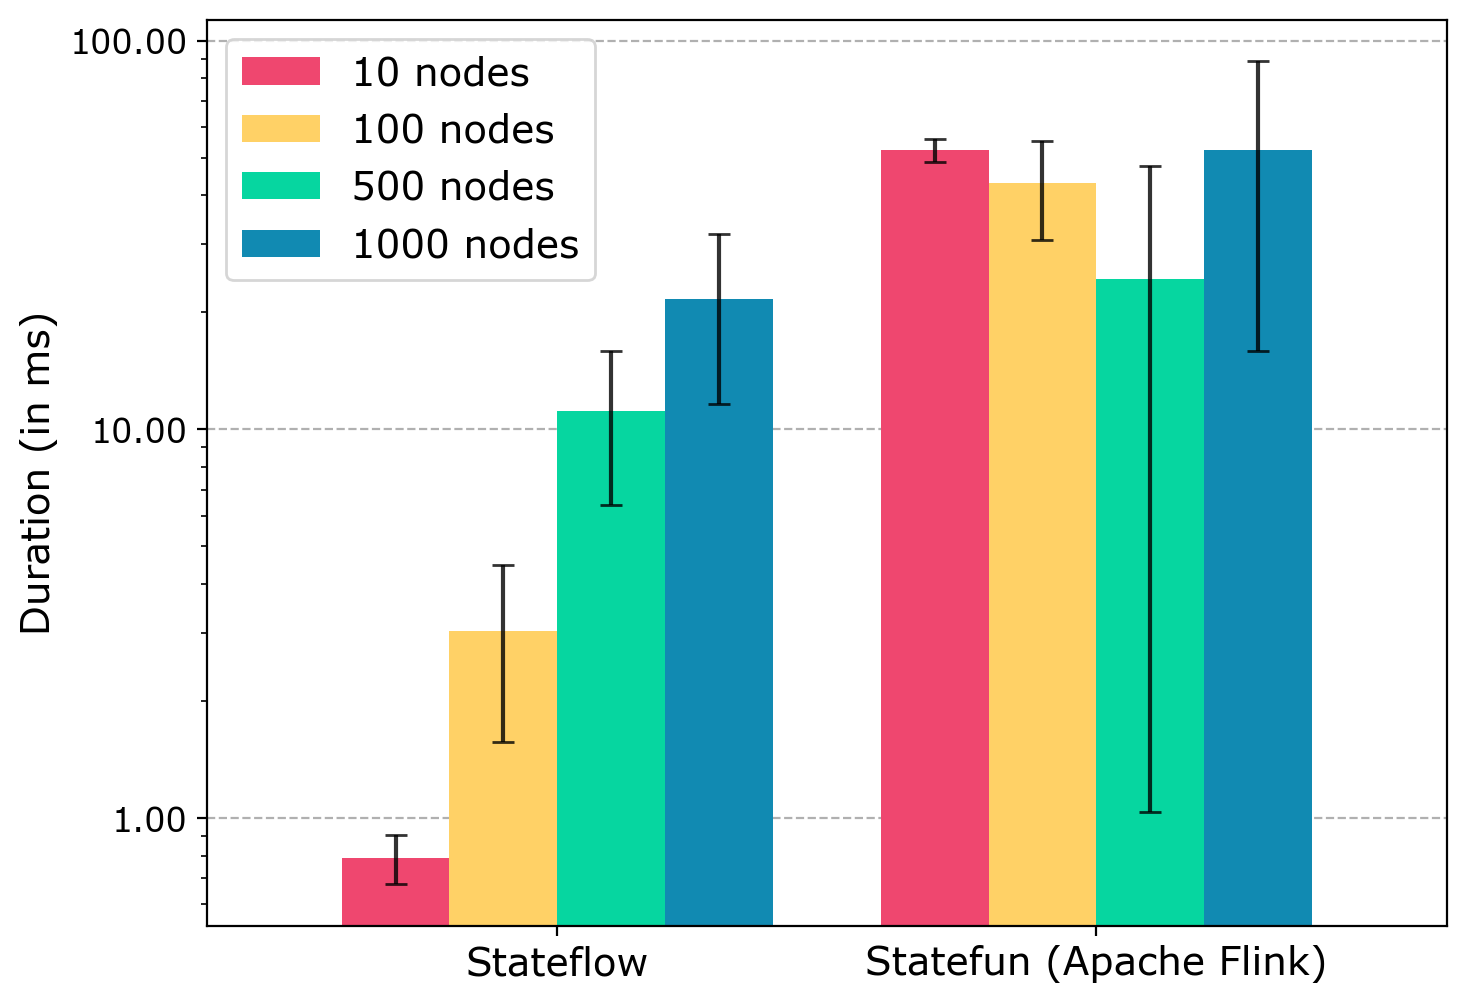

In [153]:
ax = eg_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=eg_std, rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
plt.legend(loc=0, prop={"size": 14})
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Stateflow", "Statefun (Apache Flink)"], fontsize=14)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("statefun_eg_length_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [154]:
rel_eg10_mean = eg10_data[["stateflow", "statefun"]].mean()
total_eg10 = rel_eg10_mean.sum()
rel_eg10 = ((rel_eg10_mean / total_eg10) * 100).to_frame("50 nodes")

rel_eg100_mean = eg100_data[["stateflow", "statefun"]].mean()
total_eg100 = rel_eg100_mean.sum()
rel_eg100 = ((rel_eg100_mean / total_eg100) * 100).to_frame("100 nodes")

rel_eg500_mean = eg500_data[["stateflow", "statefun"]].mean()
total_eg500 = rel_eg500_mean.sum()
rel_eg500 = ((rel_eg500_mean / total_eg500) * 100).to_frame("150 nodes")

rel_eg1000_mean = eg1000_data[["stateflow", "statefun"]].mean()
total_eg1000 = rel_eg1000_mean.sum()
rel_eg1000 = ((rel_eg1000_mean / total_eg1000) * 100).to_frame("1000 nodes")

rel_eg = pd.concat([rel_eg10, rel_eg100, rel_eg500, rel_eg1000], axis=1)
#ax = rel_overhead.transpose().plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], rot=0, stacked=True, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
print(rel_eg)

           50 nodes  100 nodes  150 nodes  1000 nodes
stateflow   1.48485   6.568207  31.397329   29.293895
statefun   98.51515  93.431793  68.602671   70.706105


# Overhead experiment, with runtime, Statefun, fixed execution graph lengths, various interaction
For a single trip to Kafka we computed an average of 7.180430976191201ms (10 000 repetitions, no batching).
Commit code: https://github.com/wzorgdrager/stateful_dataflows/commit/966aae14216652d020e4cef58f7d8a971c27e218

In [155]:
KAFKA_LATENCY = 7.180430976191201
KAFKA_ROUNDTRIP = 2 * KAFKA_LATENCY

In [156]:
in5_data = pd.read_csv("with_runtime/statefun_5in.csv")
columns = ["STATEFUN", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    in5_data = in5_data[in5_data[column] < in5_data[column].quantile(0.95)]
in5_data["stateflow"] = in5_data["ACTOR_CONSTRUCTOR"] + in5_data["ROUTING_DURATION"] + in5_data["EVENT_SERIALIZATION_DURATION"] + in5_data["STATE_SERIALIZATION_DURATION"] + in5_data["EXECUTION_GRAPH_TRAVERSAL"]
in5_data["statefun"] = in5_data["STATEFUN"] - KAFKA_ROUNDTRIP

in5_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,STATEFUN,stateflow,statefun
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,49.166667,49.166667,0.689881,4.161125,0.228058,0.173129,1.005527,77.144444,6.257720,62.783582
std,28.410811,28.410811,0.303062,1.818836,0.091735,0.072207,0.430549,28.155492,2.703450,28.155492
min,1.000000,1.000000,0.290183,1.737656,0.102793,0.079000,0.437325,37.000000,2.668100,22.639138
25%,26.250000,26.250000,0.419681,2.503806,0.144971,0.110589,0.626166,53.250000,3.810949,38.889138
50%,48.500000,48.500000,0.622614,3.827911,0.218925,0.168676,0.916278,68.000000,5.719897,53.639138
75%,72.750000,72.750000,0.975987,5.704590,0.319070,0.223743,1.396437,99.750000,8.615027,85.389138
max,99.000000,99.000000,1.511508,7.095744,0.387164,0.434815,1.852809,153.000000,10.624511,138.639138


In [157]:
in10_data = pd.read_csv("with_runtime/statefun_10in.csv")
columns = ["STATEFUN", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    in10_data = in10_data[in10_data[column] < in10_data[column].quantile(0.95)]
    
in10_data["stateflow"] = in10_data["ACTOR_CONSTRUCTOR"] + in10_data["ROUTING_DURATION"] + in10_data["EVENT_SERIALIZATION_DURATION"] + in10_data["STATE_SERIALIZATION_DURATION"] + in10_data["EXECUTION_GRAPH_TRAVERSAL"]
in10_data["statefun"] = in10_data["STATEFUN"] - KAFKA_ROUNDTRIP

in10_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,STATEFUN,stateflow,statefun
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,50.644444,50.644444,1.169579,8.497544,0.460341,0.316073,1.732528,128.811111,12.176064,114.450249
std,28.135831,28.135831,0.472930,3.470645,0.194599,0.125417,0.687066,38.413742,4.894977,38.413742
min,1.000000,1.000000,0.549430,3.901674,0.223477,0.156408,0.838049,50.000000,5.691242,35.639138
25%,26.250000,26.250000,0.692071,4.965572,0.281993,0.197739,1.024115,90.000000,7.187738,75.639138
50%,51.500000,51.500000,1.131789,8.232490,0.447101,0.301593,1.675566,133.000000,11.711226,118.639138
75%,73.750000,73.750000,1.471140,10.934179,0.569474,0.380956,2.286014,159.000000,15.513443,144.639138
max,99.000000,99.000000,2.201987,15.500988,1.406440,0.786880,3.128824,195.000000,22.031984,180.639138


In [158]:
in15_data = pd.read_csv("with_runtime/statefun_15in.csv")
columns = ["STATEFUN", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    in15_data = in15_data[in15_data[column] < in15_data[column].quantile(0.95)]
    
in15_data["stateflow"] = in15_data["ACTOR_CONSTRUCTOR"] + in15_data["ROUTING_DURATION"] + in15_data["EVENT_SERIALIZATION_DURATION"] + in15_data["STATE_SERIALIZATION_DURATION"] + in15_data["EXECUTION_GRAPH_TRAVERSAL"]
in15_data["statefun"] = in15_data["STATEFUN"] - KAFKA_ROUNDTRIP

in15_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,STATEFUN,stateflow,statefun
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,49.177778,49.177778,1.313237,11.129484,0.540864,0.365301,2.050933,161.955556,15.399819,147.594694
std,28.925156,28.925156,0.521260,3.883117,0.303039,0.111746,0.872278,37.352831,5.259800,37.352831
min,1.000000,1.000000,0.777657,6.585746,0.333984,0.231274,1.200392,74.000000,9.129053,59.639138
25%,25.250000,25.250000,0.922292,7.535273,0.389214,0.267686,1.388514,140.500000,10.618554,126.139138
50%,47.500000,47.500000,1.146135,9.967207,0.464354,0.327720,1.780381,168.000000,14.030112,153.639138
75%,73.750000,73.750000,1.602929,13.928496,0.626155,0.437146,2.455303,182.750000,18.809999,168.389138
max,99.000000,99.000000,4.016838,21.061512,2.993989,0.705553,6.105254,232.000000,28.726374,217.639138


In [159]:
in20_data = pd.read_csv("with_runtime/statefun_20in.csv")
for column in columns:
    in20_data = in20_data[in20_data[column] < in20_data[column].quantile(0.95)]
in20_data["stateflow"] = in20_data["ACTOR_CONSTRUCTOR"] + in20_data["ROUTING_DURATION"] + in20_data["EVENT_SERIALIZATION_DURATION"] + in20_data["STATE_SERIALIZATION_DURATION"] + in20_data["EXECUTION_GRAPH_TRAVERSAL"]
in20_data["statefun"] = in20_data["STATEFUN"] - KAFKA_ROUNDTRIP

in20_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,STATEFUN,stateflow,statefun
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,49.471910,49.471910,2.029895,19.067266,0.772565,0.526294,2.952363,185.471910,25.348383,171.111048
std,28.862956,28.862956,0.660778,6.410028,0.289855,0.151636,0.931011,42.810122,8.366919,42.810122
min,1.000000,1.000000,1.091788,9.932082,0.447595,0.301732,1.588343,105.000000,13.531547,90.639138
25%,25.000000,25.000000,1.450281,13.440116,0.556010,0.390745,2.110606,158.000000,17.887068,143.639138
50%,50.000000,50.000000,1.909982,18.082117,0.716659,0.501156,2.812037,189.000000,23.990982,174.639138
75%,74.000000,74.000000,2.531536,24.192477,0.943467,0.640753,3.675988,216.000000,31.925648,201.639138
max,99.000000,99.000000,3.385880,31.985859,2.521296,0.863745,4.987993,275.000000,42.350284,260.639138


In [160]:
in5_mean = in5_data[["stateflow", "statefun"]].mean().to_frame(name="5 interactions")
in10_mean = in10_data[["stateflow", "statefun"]].mean().to_frame(name="10 interactions")
in15_mean = in15_data[["stateflow", "statefun"]].mean().to_frame(name="15 interactions")
in20_mean = in20_data[["stateflow", "statefun"]].mean().to_frame(name="20 interactions")

in5_std = in5_data[["stateflow", "statefun"]].std().to_frame(name="5 interactions")
in10_std = in10_data[["stateflow", "statefun"]].std().to_frame(name="10 interactions")
in15_std = in15_data[["stateflow", "statefun"]].std().to_frame(name="15 interactions")
in20_std = in20_data[["stateflow", "statefun"]].std().to_frame(name="20 interactions")


in_mean = pd.concat([in5_mean, in10_mean, in15_mean, in20_mean], axis=1)
in_std = pd.concat([in5_std, in10_std, in15_std, in20_std], axis=1)
in_statefun_mean = in_mean.loc[["stateflow", "statefun"]].rename({"stateflow": "stateflow_statefun"})
in_statefun_std = in_std.loc[["stateflow", "statefun"]].rename({"stateflow": "stateflow_statefun"})
print(in_statefun_mean)
print(in_statefun_mean)
print(in_mean)
print(in_std)

                    5 interactions  10 interactions  15 interactions  \
stateflow_statefun        6.257720        12.176064        15.399819   
statefun                 62.783582       114.450249       147.594694   

                    20 interactions  
stateflow_statefun        25.348383  
statefun                 171.111048  
                    5 interactions  10 interactions  15 interactions  \
stateflow_statefun        6.257720        12.176064        15.399819   
statefun                 62.783582       114.450249       147.594694   

                    20 interactions  
stateflow_statefun        25.348383  
statefun                 171.111048  
           5 interactions  10 interactions  15 interactions  20 interactions
stateflow        6.257720        12.176064        15.399819        25.348383
statefun        62.783582       114.450249       147.594694       171.111048
           5 interactions  10 interactions  15 interactions  20 interactions
stateflow        2.703450     

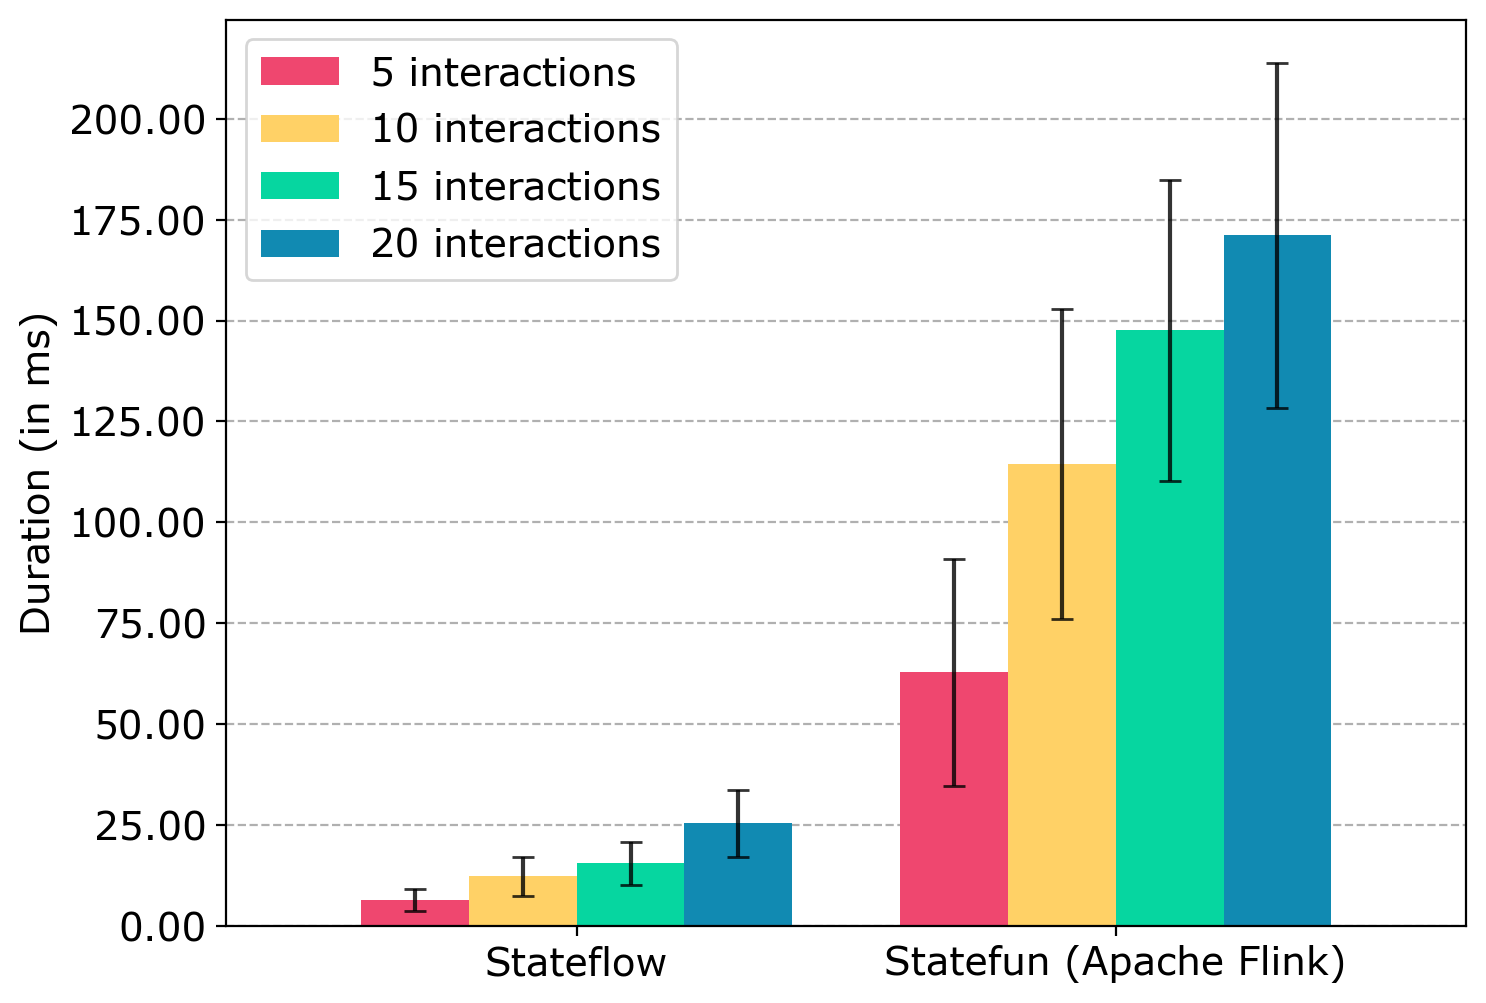

In [161]:
ax = in_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=in_std, rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
plt.legend(loc=0, prop={"size": 14})
#ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
plt.yticks(fontsize=14)
ax.set_xticklabels(["Stateflow", "Statefun (Apache Flink)"], fontsize=14)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("statefun_in_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)

In [162]:
rel_in5_mean = in5_data[["stateflow", "statefun"]].mean()
total_in5 = rel_in5_mean.sum()
rel_in5 = ((rel_in5_mean / total_in5) * 100).to_frame("5 interactions")

rel_in10_mean = in10_data[["stateflow", "statefun"]].mean()
total_in10 = rel_in10_mean.sum()
rel_in10 = ((rel_in10_mean / total_in10) * 100).to_frame("10 interactions")

rel_in15_mean = in15_data[["stateflow", "statefun"]].mean()
total_in15 = rel_in15_mean.sum()
rel_in15 = ((rel_in15_mean / total_in15) * 100).to_frame("15 interactions")

rel_in20_mean = in20_data[["stateflow", "statefun"]].mean()
total_in20 = rel_in20_mean.sum()
rel_in20 = ((rel_in20_mean / total_in20) * 100).to_frame("20 interactions")

rel_in = pd.concat([rel_in5, rel_in10, rel_in15, rel_in20], axis=1)
#ax = rel_overhead.transpose().plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], rot=0, stacked=True, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
print(rel_in)

           5 interactions  10 interactions  15 interactions  20 interactions
stateflow        9.063735         9.615745          9.44806        12.902604
statefun        90.936265        90.384255         90.55194        87.097396


# Overhead experiment, with runtime, PyFlink, various state sizes
For a single trip to Kafka we computed an average of 7.180430976191201ms (10 000 repetitions, no batching).
Commit code: https://github.com/wzorgdrager/stateful_dataflows/commit/1a5e535201fdd1608da95cbfa1b02165998f50c7

In [163]:
KAFKA_LATENCY = 7.180430976191201
KAFKA_ROUNDTRIP = 2 * KAFKA_LATENCY

In [164]:
fiftykb_data = pd.read_csv("with_runtime/pyflink_50kb.csv")

columns = ["PYFLINK", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    fiftykb_data = fiftykb_data[fiftykb_data[column] < fiftykb_data[column].quantile(0.95)] 

fiftykb_data["stateflow"] = fiftykb_data["ACTOR_CONSTRUCTOR"] + fiftykb_data["ROUTING_DURATION"] + fiftykb_data["EVENT_SERIALIZATION_DURATION"] + fiftykb_data["STATE_SERIALIZATION_DURATION"] 
fiftykb_data["pyflink"] = fiftykb_data["PYFLINK"] - KAFKA_ROUNDTRIP

fiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,STATEFUN,PYFLINK,stateflow,pyflink
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,0.0,90.000000,90.000000,90.000000
mean,47.588889,47.588889,0.060826,0.052423,0.023051,0.016697,NaN,192.944444,0.152997,178.583582
std,28.933436,28.933436,0.013091,0.007950,0.015983,0.011473,NaN,21.022386,0.029399,21.022386
min,0.000000,0.000000,0.038371,0.039775,0.015293,0.009590,NaN,87.000000,0.106043,72.639138
25%,23.250000,23.250000,0.051256,0.045941,0.018193,0.012548,NaN,186.250000,0.133328,171.889138
50%,46.000000,46.000000,0.061358,0.050542,0.020401,0.015849,NaN,197.000000,0.149826,182.639138
75%,73.750000,73.750000,0.069045,0.057753,0.022278,0.017250,NaN,206.750000,0.166188,192.389138
max,99.000000,99.000000,0.098407,0.069832,0.144277,0.117949,NaN,216.000000,0.261778,201.639138


In [165]:
hundredkb_data = pd.read_csv("with_runtime/pyflink_100kb.csv")
columns = ["PYFLINK", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    hundredkb_data = hundredkb_data[hundredkb_data[column] < hundredkb_data[column].quantile(0.95)] 
    
hundredkb_data["stateflow"] = hundredkb_data["ACTOR_CONSTRUCTOR"] + hundredkb_data["ROUTING_DURATION"] + hundredkb_data["EVENT_SERIALIZATION_DURATION"] + hundredkb_data["STATE_SERIALIZATION_DURATION"] 
hundredkb_data["pyflink"] = hundredkb_data["PYFLINK"]- KAFKA_ROUNDTRIP

hundredkb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,PYFLINK,stateflow,pyflink
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,49.911111,49.911111,0.055427,0.044860,0.017679,0.012866,117.077778,0.130833,102.716916
std,28.683725,28.683725,0.009092,0.003531,0.001979,0.002227,15.441974,0.011068,15.441974
min,0.000000,0.000000,0.046993,0.038618,0.015386,0.010837,83.000000,0.114969,68.639138
25%,25.250000,25.250000,0.050690,0.042289,0.016683,0.011681,106.250000,0.123726,91.889138
50%,50.000000,50.000000,0.053918,0.044877,0.017326,0.012197,118.000000,0.129243,103.639138
75%,73.750000,73.750000,0.057743,0.047204,0.018064,0.013099,126.000000,0.135515,111.639138
max,99.000000,99.000000,0.124865,0.051276,0.030201,0.023735,184.000000,0.199554,169.639138


In [166]:
hundredfiftykb_data = pd.read_csv("with_runtime/pyflink_150kb.csv")

columns = ["PYFLINK", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    hundredfiftykb_data = hundredfiftykb_data[hundredfiftykb_data[column] < hundredfiftykb_data[column].quantile(0.95)] 
    
hundredfiftykb_data["stateflow"] = hundredfiftykb_data["ACTOR_CONSTRUCTOR"] + hundredfiftykb_data["ROUTING_DURATION"] + hundredfiftykb_data["EVENT_SERIALIZATION_DURATION"] + hundredfiftykb_data["STATE_SERIALIZATION_DURATION"] 
hundredfiftykb_data["pyflink"] = hundredfiftykb_data["PYFLINK"]- KAFKA_ROUNDTRIP
hundredfiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,PYFLINK,stateflow,pyflink
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,49.188889,49.188889,0.064986,0.044693,0.017922,0.012625,108.133333,0.140226,93.772471
std,29.094536,29.094536,0.006382,0.003817,0.002840,0.001785,39.523624,0.008158,39.523624
min,0.000000,0.000000,0.056542,0.039153,0.015388,0.010535,37.000000,0.128296,22.639138
25%,24.250000,24.250000,0.060722,0.041917,0.016394,0.011504,59.750000,0.134327,45.389138
50%,49.500000,49.500000,0.063485,0.043818,0.016901,0.012164,128.000000,0.138678,113.639138
75%,74.750000,74.750000,0.067469,0.046553,0.018334,0.012913,139.750000,0.144352,125.389138
max,99.000000,99.000000,0.095203,0.057001,0.033314,0.018777,152.000000,0.180156,137.639138


In [167]:
twohundredkb_data = pd.read_csv("with_runtime/pyflink_200kb.csv")

columns = ["PYFLINK", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    twohundredkb_data = twohundredkb_data[twohundredkb_data[column] < twohundredkb_data[column].quantile(0.95)] 
    
    
twohundredkb_data["stateflow"] = twohundredkb_data["ACTOR_CONSTRUCTOR"] + twohundredkb_data["ROUTING_DURATION"] + twohundredkb_data["EVENT_SERIALIZATION_DURATION"] + twohundredkb_data["STATE_SERIALIZATION_DURATION"] 
twohundredkb_data["pyflink"] = twohundredkb_data["PYFLINK"] - KAFKA_ROUNDTRIP
hundredfiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,PYFLINK,stateflow,pyflink
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,49.188889,49.188889,0.064986,0.044693,0.017922,0.012625,108.133333,0.140226,93.772471
std,29.094536,29.094536,0.006382,0.003817,0.002840,0.001785,39.523624,0.008158,39.523624
min,0.000000,0.000000,0.056542,0.039153,0.015388,0.010535,37.000000,0.128296,22.639138
25%,24.250000,24.250000,0.060722,0.041917,0.016394,0.011504,59.750000,0.134327,45.389138
50%,49.500000,49.500000,0.063485,0.043818,0.016901,0.012164,128.000000,0.138678,113.639138
75%,74.750000,74.750000,0.067469,0.046553,0.018334,0.012913,139.750000,0.144352,125.389138
max,99.000000,99.000000,0.095203,0.057001,0.033314,0.018777,152.000000,0.180156,137.639138


In [168]:
fiftykb_mean = fiftykb_data[["stateflow", "pyflink"]].mean().to_frame(name="50KB")
hundredkb_mean = hundredkb_data[["stateflow", "pyflink"]].mean().to_frame(name="100KB")
hundredfiftykb_mean = hundredfiftykb_data[["stateflow", "pyflink"]].mean().to_frame(name="150KB")
twohundredkb_mean = twohundredkb_data[["stateflow", "pyflink"]].mean().to_frame(name="200KB")

fiftykb_std = fiftykb_data[["stateflow", "pyflink"]].std().to_frame(name="50KB")
hundredkb_std = hundredkb_data[["stateflow", "pyflink"]].std().to_frame(name="100KB")
hundredfiftykb_std = hundredfiftykb_data[["stateflow", "pyflink"]].std().to_frame(name="150KB")
twohundredkb_std = twohundredkb_data[["stateflow", "pyflink"]].std().to_frame(name="200KB")


overhead_mean = pd.concat([fiftykb_mean, hundredkb_mean, hundredfiftykb_mean, twohundredkb_mean], axis=1)
overhead_std = pd.concat([fiftykb_std, hundredkb_std, hundredfiftykb_std, twohundredkb_std], axis=1)
state_pyflink_mean = overhead_mean.loc[["stateflow", "pyflink"]].rename({"stateflow": "stateflow_pyflink"})
state_pyflink_std = overhead_std.loc[["stateflow", "pyflink"]].rename({"stateflow": "stateflow_pyflink"})
print(state_pyflink_mean)
print(state_pyflink_std)
print(overhead_mean)
print(overhead_std)

                         50KB       100KB      150KB       200KB
stateflow_pyflink    0.152997    0.130833   0.140226    0.162688
pyflink            178.583582  102.716916  93.772471  202.717790
                        50KB      100KB      150KB     200KB
stateflow_pyflink   0.029399   0.011068   0.008158  0.037292
pyflink            21.022386  15.441974  39.523624  7.904580
                 50KB       100KB      150KB       200KB
stateflow    0.152997    0.130833   0.140226    0.162688
pyflink    178.583582  102.716916  93.772471  202.717790
                50KB      100KB      150KB     200KB
stateflow   0.029399   0.011068   0.008158  0.037292
pyflink    21.022386  15.441974  39.523624  7.904580


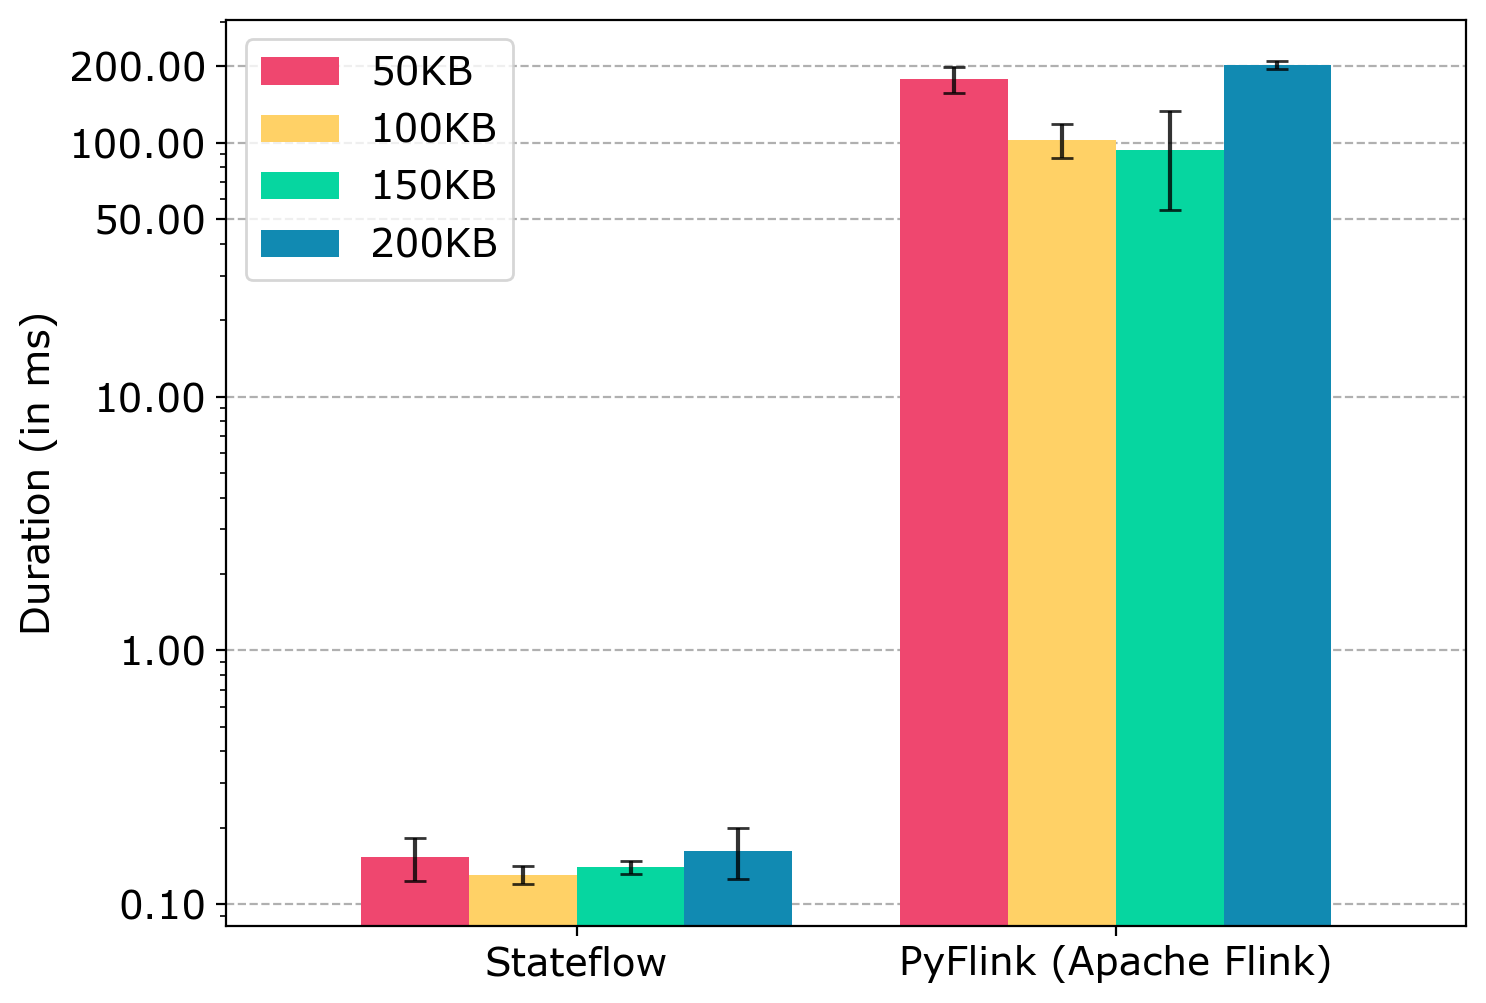

In [169]:
ax = overhead_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=overhead_std, rot=0, fontsize=14, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
plt.legend(loc=0, prop={"size": 14})
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Stateflow", "PyFlink (Apache Flink)"], fontsize=14)
ax.set_yticks([0.1, 1, 10, 50, 100, 200])
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("pyflink_single_invocation_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [170]:
rel_fiftykb_mean = fiftykb_data[["stateflow", "pyflink"]].mean()
total_fiftykb = rel_fiftykb_mean.sum()
rel_fiftykb = ((rel_fiftykb_mean / total_fiftykb) * 100).to_frame("50KB")

rel_hundredkb_mean = hundredkb_data[["stateflow", "pyflink"]].mean()
total_hundredkb = rel_hundredkb_mean.sum()
rel_hundredkb = ((rel_hundredkb_mean / total_hundredkb) * 100).to_frame("100KB")

rel_hundredfiftykb_mean = hundredfiftykb_data[["stateflow", "pyflink"]].mean()
total_hundredfiftykb = rel_hundredfiftykb_mean.sum()
rel_hundredfiftykb = ((rel_hundredfiftykb_mean / total_hundredfiftykb) * 100).to_frame("150KB")

rel_twohundredkb_mean = twohundredkb_data[["stateflow", "pyflink"]].mean()
total_twohundredkb = rel_twohundredkb_mean.sum()
rel_twohundredkb = ((rel_twohundredkb_mean / total_twohundredkb) * 100).to_frame("200KB")

rel_overhead = pd.concat([rel_fiftykb, rel_hundredkb, rel_hundredfiftykb, rel_twohundredkb], axis=1)
#ax = rel_overhead.transpose().plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], rot=0, stacked=True, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
print(rel_overhead)


                50KB     100KB      150KB      200KB
stateflow   0.085599   0.12721   0.149315   0.080189
pyflink    99.914401  99.87279  99.850685  99.919811


# Overhead experiment, with runtime, PyFlink, various execution graph lengths, no interaction
For a single trip to Kafka we computed an average of 7.180430976191201ms (10 000 repetitions, no batching).
Commit code: https://github.com/wzorgdrager/stateful_dataflows/commit/671478a34ef4da8c96eea971d0c7657b3fd9317b

500 and 1000 did not work in PyFlink: _pickle.PicklingError: Could not pickle object as excessively deep recursion required. 

In [171]:
KAFKA_LATENCY = 7.180430976191201
KAFKA_ROUNDTRIP = 2 * KAFKA_LATENCY

In [172]:
eg10_data = pd.read_csv("with_runtime/pyflink_10eg.csv")
columns = ["PYFLINK", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    eg10_data = eg10_data[eg10_data[column] < eg10_data[column].quantile(0.95)] 
    
eg10_data["stateflow"] = eg10_data["ACTOR_CONSTRUCTOR"] + eg10_data["ROUTING_DURATION"] + eg10_data["EVENT_SERIALIZATION_DURATION"] + eg10_data["STATE_SERIALIZATION_DURATION"] + eg10_data["EXECUTION_GRAPH_TRAVERSAL"]
eg10_data["pyflink"] = eg10_data["PYFLINK"] - KAFKA_ROUNDTRIP

eg10_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,PYFLINK,stateflow,pyflink
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,48.288889,48.288889,0.118174,0.119448,0.051919,0.026465,0.226857,170.500000,0.542863,156.139138
std,29.314737,29.314737,0.159477,0.025715,0.020843,0.062611,0.204614,25.817532,0.311089,25.817532
min,0.000000,0.000000,0.041735,0.082370,0.026235,0.009608,0.081806,91.000000,0.246679,76.639138
25%,22.250000,22.250000,0.050799,0.096161,0.033836,0.011615,0.101627,156.000000,0.316865,141.639138
50%,48.500000,48.500000,0.078120,0.115714,0.051364,0.017941,0.169005,175.500000,0.430003,161.139138
75%,72.750000,72.750000,0.132823,0.137010,0.064799,0.027509,0.296282,188.750000,0.668164,174.389138
max,98.000000,98.000000,1.358229,0.186218,0.131109,0.603654,1.489886,208.000000,1.836508,193.639138


In [173]:
eg100_data = pd.read_csv("with_runtime/pyflink_100eg.csv")
columns = ["PYFLINK", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    eg100_data = eg100_data[eg100_data[column] < eg100_data[column].quantile(0.95)]
eg100_data["stateflow"] = eg100_data["ACTOR_CONSTRUCTOR"] + eg100_data["ROUTING_DURATION"] + eg100_data["EVENT_SERIALIZATION_DURATION"] + eg100_data["STATE_SERIALIZATION_DURATION"] + eg100_data["EXECUTION_GRAPH_TRAVERSAL"] 
eg100_data["pyflink"] = eg100_data["PYFLINK"] - KAFKA_ROUNDTRIP

#eg100_data["stateflow"] = eg100_data[eg100_data["stateflow"] < eg100_data["stateflow"].quantile(0.95)]

eg100_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,PYFLINK,stateflow,pyflink
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,52.134831,52.134831,0.075766,0.488111,0.053678,0.084729,1.423224,124.764045,2.125507,110.403183
std,28.644447,28.644447,0.052852,0.114268,0.050475,0.646830,1.571714,27.218402,1.734124,27.218402
min,1.000000,1.000000,0.041907,0.353870,0.030516,0.009056,0.618769,80.000000,1.127866,65.639138
25%,28.000000,28.000000,0.047674,0.385381,0.036612,0.010531,0.720729,107.000000,1.347247,92.639138
50%,54.000000,54.000000,0.057930,0.451311,0.041561,0.012244,0.934267,118.000000,1.523813,103.639138
75%,76.000000,76.000000,0.078262,0.573378,0.049651,0.016017,1.349600,131.000000,1.999197,116.639138
max,99.000000,99.000000,0.341929,0.787374,0.427819,6.116886,12.204795,196.000000,12.908282,181.639138


In [174]:
eg10_mean = eg10_data[["stateflow", "pyflink"]].mean().to_frame(name="10 nodes")
eg100_mean = eg100_data[["stateflow", "pyflink"]].mean().to_frame(name="100 nodes")

eg10_std = eg10_data[["stateflow", "pyflink"]].std().to_frame(name="10 nodes")
eg100_std = eg100_data[["stateflow", "pyflink"]].std().to_frame(name="100 nodes")


eg_mean = pd.concat([eg10_mean, eg100_mean], axis=1)
eg_std = pd.concat([eg10_std, eg100_std], axis=1)
eg_pyflink_mean = eg_mean.loc[["stateflow", "pyflink"]].rename({"stateflow": "stateflow_pyflink"})
eg_pyflink_std = eg_std.loc[["stateflow", "pyflink"]].rename({"stateflow": "stateflow_pyflink"})
print(eg_pyflink_mean)
print(eg_pyflink_std)
print(eg_mean)
print(eg_std)

                     10 nodes   100 nodes
stateflow_pyflink    0.542863    2.125507
pyflink            156.139138  110.403183
                    10 nodes  100 nodes
stateflow_pyflink   0.311089   1.734124
pyflink            25.817532  27.218402
             10 nodes   100 nodes
stateflow    0.542863    2.125507
pyflink    156.139138  110.403183
            10 nodes  100 nodes
stateflow   0.311089   1.734124
pyflink    25.817532  27.218402


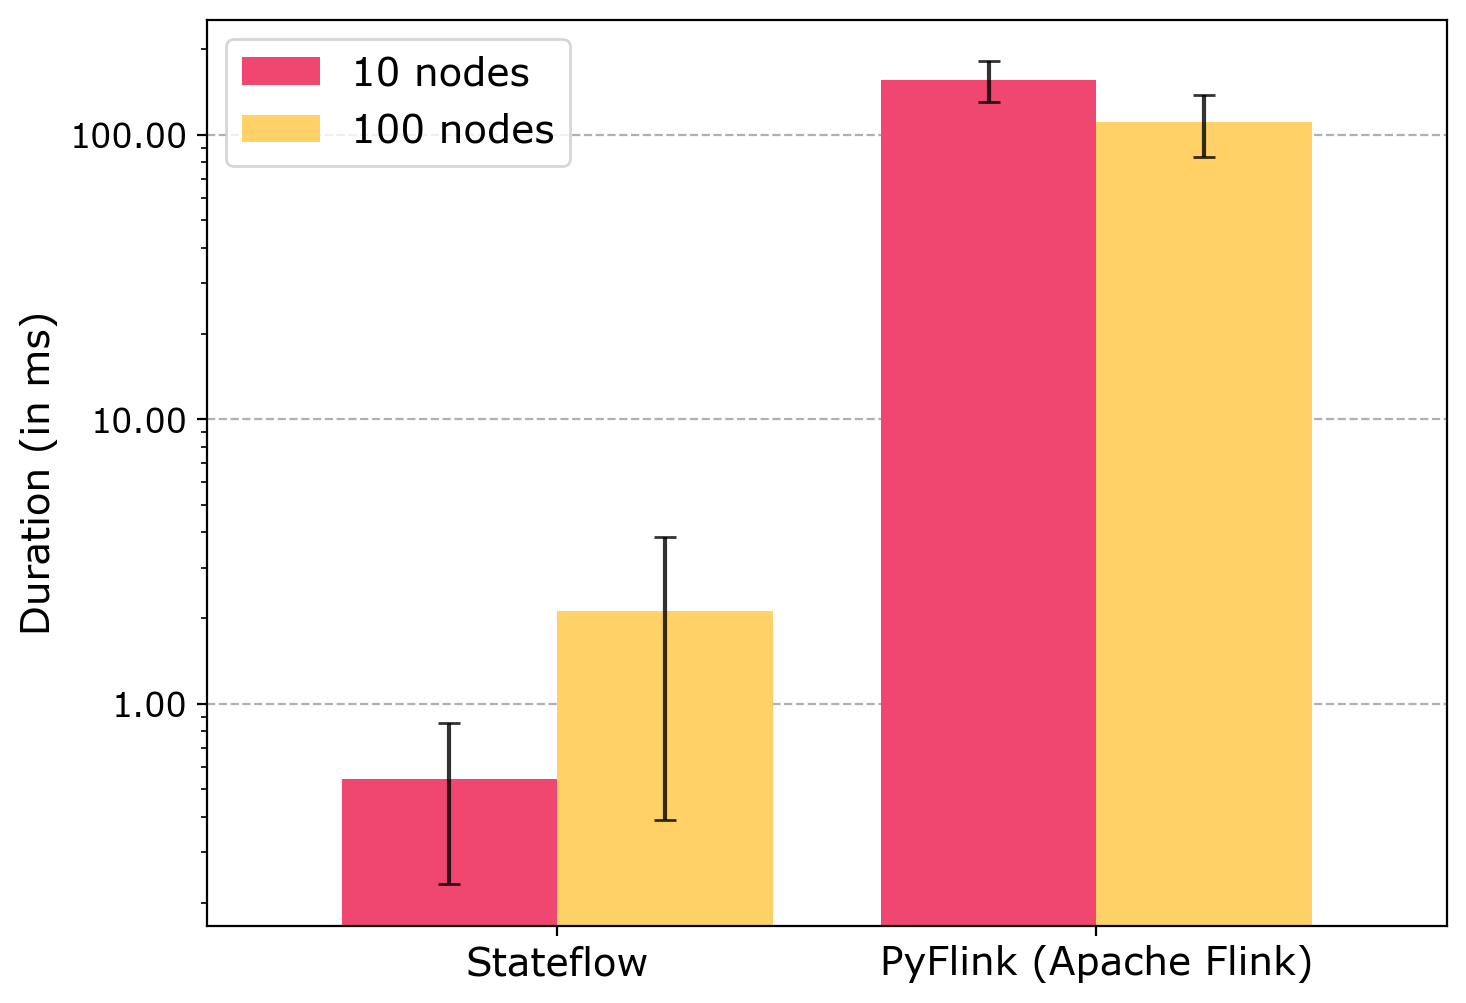

In [175]:
ax = eg_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=eg_std, rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
plt.legend(loc=0, prop={"size": 14})
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Stateflow", "PyFlink (Apache Flink)"], fontsize=14)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("pyflink_eg_length_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [176]:
rel_eg10_mean = eg10_data[["stateflow", "pyflink"]].mean()
total_eg10 = rel_eg10_mean.sum()
rel_eg10 = ((rel_eg10_mean / total_eg10) * 100).to_frame("50 nodes")

rel_eg100_mean = eg100_data[["stateflow", "pyflink"]].mean()
total_eg100 = rel_eg100_mean.sum()
rel_eg100 = ((rel_eg100_mean / total_eg100) * 100).to_frame("100 nodes")

rel_eg = pd.concat([rel_eg10, rel_eg100], axis=1)
#ax = rel_overhead.transpose().plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], rot=0, stacked=True, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
print(rel_eg)

            50 nodes  100 nodes
stateflow   0.346474   1.888858
pyflink    99.653526  98.111142


# Overhead experiment, with runtime, PyFlink, fixed execution graph lengths, various interaction
For a single trip to Kafka we computed an average of 7.180430976191201ms (10 000 repetitions, no batching).
Commit code: https://github.com/wzorgdrager/stateful_dataflows/commit/3ae625318413a608e6270f0463135e765c3c2939

In [177]:
KAFKA_LATENCY = 7.180430976191201
KAFKA_ROUNDTRIP = 2 * KAFKA_LATENCY

In [178]:
in5_data = pd.read_csv("with_runtime/pyflink_5in.csv")
columns = ["PYFLINK", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    in5_data = in5_data[in5_data[column] < in5_data[column].quantile(0.95)]
in5_data["stateflow"] = in5_data["ACTOR_CONSTRUCTOR"] + in5_data["ROUTING_DURATION"] + in5_data["EVENT_SERIALIZATION_DURATION"] + in5_data["STATE_SERIALIZATION_DURATION"] + in5_data["EXECUTION_GRAPH_TRAVERSAL"]
in5_data["pyflink"] = in5_data["PYFLINK"] - KAFKA_ROUNDTRIP

in5_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,PYFLINK,stateflow,pyflink
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,46.288889,46.288889,0.723969,1.609199,0.287790,0.168388,0.870065,2130.433333,3.659412,2116.072471
std,28.142592,28.142592,0.573046,0.239127,0.099594,0.070015,0.179760,311.586374,0.792106,311.586374
min,0.000000,0.000000,0.493938,1.229913,0.212437,0.121631,0.673018,1577.000000,2.788548,1562.639138
25%,22.250000,22.250000,0.561520,1.432663,0.247706,0.137465,0.750050,1890.750000,3.196119,1876.389138
50%,45.500000,45.500000,0.616888,1.547747,0.263973,0.148530,0.822560,2077.000000,3.457921,2062.639138
75%,68.750000,68.750000,0.704370,1.755550,0.298859,0.168001,0.921762,2303.000000,3.923193,2288.639138
max,99.000000,99.000000,5.884185,2.324241,1.122419,0.617243,1.475118,2816.000000,8.831755,2801.639138


In [179]:
in10_data = pd.read_csv("with_runtime/pyflink_10in.csv")
columns = ["PYFLINK", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    in10_data = in10_data[in10_data[column] < in10_data[column].quantile(0.95)]
    
in10_data["stateflow"] = in10_data["ACTOR_CONSTRUCTOR"] + in10_data["ROUTING_DURATION"] + in10_data["EVENT_SERIALIZATION_DURATION"] + in10_data["STATE_SERIALIZATION_DURATION"] + in10_data["EXECUTION_GRAPH_TRAVERSAL"]
in10_data["pyflink"] = in10_data["PYFLINK"] - KAFKA_ROUNDTRIP

in10_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,PYFLINK,stateflow,pyflink
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,52.988889,52.988889,1.356891,3.236901,0.523038,0.281682,1.818204,4029.300000,7.216715,4014.939138
std,27.761219,27.761219,0.941046,0.286822,0.160123,0.048119,0.632881,489.945157,1.594473,489.945157
min,1.000000,1.000000,0.941851,2.768844,0.407519,0.229084,1.275840,3114.000000,5.729571,3099.639138
25%,31.250000,31.250000,1.032608,3.033498,0.464672,0.249744,1.454044,3597.750000,6.317929,3583.389138
50%,53.500000,53.500000,1.079797,3.220428,0.490023,0.264925,1.533507,3985.500000,6.669400,3971.139138
75%,76.750000,76.750000,1.334804,3.382711,0.524763,0.299379,1.943585,4556.000000,7.546780,4541.639138
max,99.000000,99.000000,7.472925,3.949280,1.852141,0.499058,5.135273,4891.000000,15.127970,4876.639138


In [180]:
in15_data = pd.read_csv("with_runtime/pyflink_15in.csv")
columns = ["PYFLINK", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    in15_data = in15_data[in15_data[column] < in15_data[column].quantile(0.95)]
    
in15_data["stateflow"] = in15_data["ACTOR_CONSTRUCTOR"] + in15_data["ROUTING_DURATION"] + in15_data["EVENT_SERIALIZATION_DURATION"] + in15_data["STATE_SERIALIZATION_DURATION"] + in15_data["EXECUTION_GRAPH_TRAVERSAL"]
in15_data["pyflink"] = in15_data["PYFLINK"] - KAFKA_ROUNDTRIP

in15_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,PYFLINK,stateflow,pyflink
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,48.788889,48.788889,1.481187,5.089194,0.733850,0.373699,2.069084,4928.355556,9.747014,4913.994694
std,28.173417,28.173417,0.092166,0.261815,0.157347,0.046871,0.160452,255.879374,0.455116,255.879374
min,0.000000,0.000000,1.278442,4.523388,0.629144,0.322149,1.775610,4484.000000,8.723605,4469.639138
25%,25.250000,25.250000,1.413559,4.917424,0.668952,0.353421,1.972377,4700.750000,9.401214,4686.389138
50%,48.500000,48.500000,1.474677,5.086242,0.689401,0.363686,2.047131,4902.500000,9.695830,4888.139138
75%,71.750000,71.750000,1.524164,5.220312,0.741333,0.376041,2.154032,5097.250000,10.000310,5082.889138
max,98.000000,98.000000,1.841260,5.818211,1.840817,0.705324,2.796364,5501.000000,10.839990,5486.639138


In [181]:
in20_data = pd.read_csv("with_runtime/pyflink_20in.csv")
columns = ["PYFLINK", "EVENT_SERIALIZATION_DURATION"]
for column in columns:
    in20_data = in20_data[in20_data[column] < in20_data[column].quantile(0.95)]
in20_data["stateflow"] = in20_data["ACTOR_CONSTRUCTOR"] + in20_data["ROUTING_DURATION"] + in20_data["EVENT_SERIALIZATION_DURATION"] + in20_data["STATE_SERIALIZATION_DURATION"] + in20_data["EXECUTION_GRAPH_TRAVERSAL"]
in20_data["pyflink"] = in20_data["PYFLINK"] - KAFKA_ROUNDTRIP

in20_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,PYFLINK,stateflow,pyflink
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,50.433333,50.433333,1.892298,7.075762,0.912045,0.477265,2.585500,5977.377778,12.942869,5963.016916
std,29.144757,29.144757,0.400798,0.245885,0.066352,0.070028,0.124750,407.574122,0.549818,407.574122
min,0.000000,0.000000,1.709848,6.459598,0.836330,0.427129,2.364558,5197.000000,12.107139,5182.639138
25%,25.500000,25.500000,1.804514,6.908244,0.873090,0.449998,2.504978,5683.750000,12.648088,5669.389138
50%,48.500000,48.500000,1.837528,7.010001,0.892710,0.460640,2.563307,6001.000000,12.854293,5986.639138
75%,76.500000,76.500000,1.895173,7.238045,0.933315,0.475567,2.648225,6195.750000,13.107249,6181.389138
max,99.000000,99.000000,5.575856,7.704630,1.170886,0.957825,2.979527,7061.000000,16.508371,7046.639138


In [182]:
in5_mean = in5_data[["stateflow", "pyflink"]].mean().to_frame(name="5 interactions")
in10_mean = in10_data[["stateflow", "pyflink"]].mean().to_frame(name="10 interactions")
in15_mean = in15_data[["stateflow", "pyflink"]].mean().to_frame(name="15 interactions")
in20_mean = in20_data[["stateflow", "pyflink"]].mean().to_frame(name="20 interactions")

in5_std = in5_data[["stateflow", "pyflink"]].std().to_frame(name="5 interactions")
in10_std = in10_data[["stateflow", "pyflink"]].std().to_frame(name="10 interactions")
in15_std = in15_data[["stateflow", "pyflink"]].std().to_frame(name="15 interactions")
in20_std = in20_data[["stateflow", "pyflink"]].std().to_frame(name="20 interactions")


in_mean = pd.concat([in5_mean, in10_mean, in15_mean, in20_mean], axis=1)
in_std = pd.concat([in5_std, in10_std, in15_std, in20_std], axis=1)
in_pyflink_mean = in_mean.loc[["stateflow", "pyflink"]].rename({"stateflow": "stateflow_pyflink"})
in_pyflink_std = in_std.loc[["stateflow", "pyflink"]].rename({"stateflow": "stateflow_pyflink"})
print(in_pyflink_mean)
print(in_pyflink_std)
print(in_mean)
print(in_std)

                   5 interactions  10 interactions  15 interactions  \
stateflow_pyflink        3.659412         7.216715         9.747014   
pyflink               2116.072471      4014.939138      4913.994694   

                   20 interactions  
stateflow_pyflink        12.942869  
pyflink                5963.016916  
                   5 interactions  10 interactions  15 interactions  \
stateflow_pyflink        0.792106         1.594473         0.455116   
pyflink                311.586374       489.945157       255.879374   

                   20 interactions  
stateflow_pyflink         0.549818  
pyflink                 407.574122  
           5 interactions  10 interactions  15 interactions  20 interactions
stateflow        3.659412         7.216715         9.747014        12.942869
pyflink       2116.072471      4014.939138      4913.994694      5963.016916
           5 interactions  10 interactions  15 interactions  20 interactions
stateflow        0.792106         1.594473

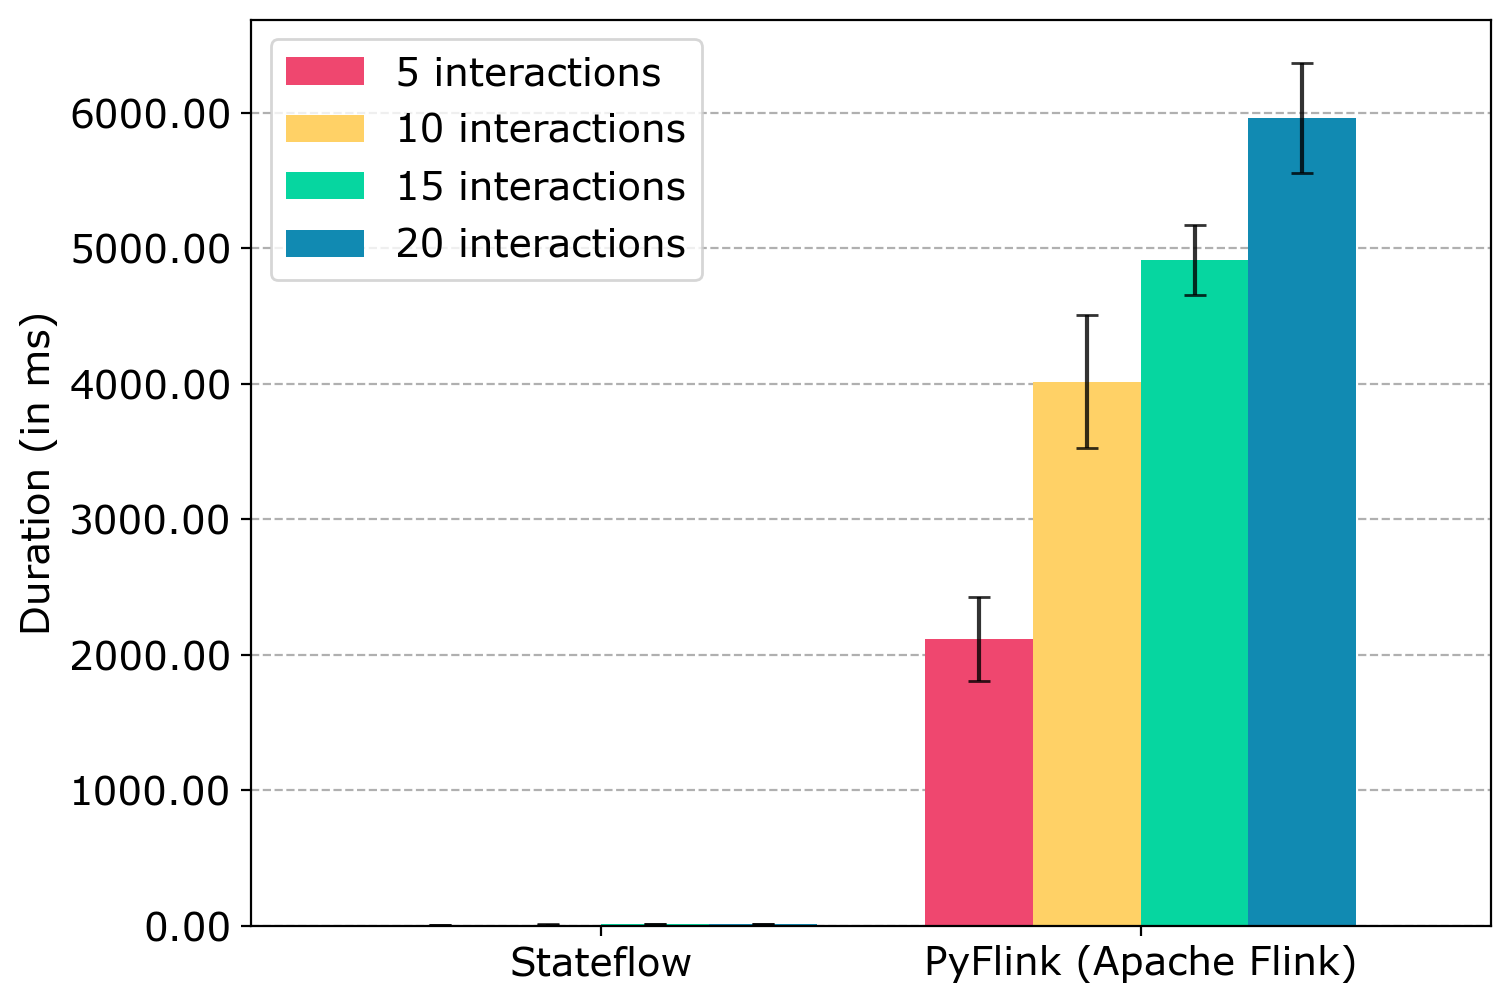

In [183]:
ax = in_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=in_std, rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
plt.legend(loc=0, prop={"size": 14})
#ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
plt.yticks(fontsize=14)
ax.set_xticklabels(["Stateflow", "PyFlink (Apache Flink)"], fontsize=14)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("pyflink_in_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)

In [184]:
rel_in5_mean = in5_data[["stateflow", "pyflink"]].mean()
total_in5 = rel_in5_mean.sum()
rel_in5 = ((rel_in5_mean / total_in5) * 100).to_frame("5 interactions")

rel_in10_mean = in10_data[["stateflow", "pyflink"]].mean()
total_in10 = rel_in10_mean.sum()
rel_in10 = ((rel_in10_mean / total_in10) * 100).to_frame("10 interactions")

rel_in15_mean = in15_data[["stateflow", "pyflink"]].mean()
total_in15 = rel_in15_mean.sum()
rel_in15 = ((rel_in15_mean / total_in15) * 100).to_frame("15 interactions")

rel_in20_mean = in20_data[["stateflow", "pyflink"]].mean()
total_in20 = rel_in20_mean.sum()
rel_in20 = ((rel_in20_mean / total_in20) * 100).to_frame("20 interactions")

rel_in = pd.concat([rel_in5, rel_in10, rel_in15, rel_in20], axis=1)
#ax = rel_overhead.transpose().plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], rot=0, stacked=True, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
print(rel_in)

           5 interactions  10 interactions  15 interactions  20 interactions
stateflow        0.172636         0.179424         0.197959         0.216582
pyflink         99.827364        99.820576        99.802041        99.783418


BEAM: 78.4837166709005ms for Kafka trip

# Various state sizes, Flink + JVM

In [211]:
fiftykb_data = pd.read_csv("with_runtime/flink_50kb.csv")

fiftykb_data["stateflow"] = fiftykb_data["ACTOR_CONSTRUCTION"] + fiftykb_data["ROUTING_DURATION"] + fiftykb_data["EVENT_SERIALIZATION_DURATION"] + fiftykb_data["STATE_SERIALIZATION_DURATION"] 
fiftykb_data["flink"] = fiftykb_data["FLINK"] + fiftykb_data["TO_AWS"]

fiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,FLINK,ACTOR_CONSTRUCTION,TO_AWS,stateflow,flink
count,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,49.500000,0.044183,0.588304,0.024404,NaN,0.0,3.120000,0.015252,110.730000,0.672144,113.850000
std,29.011492,29.011492,0.005050,0.036467,0.051198,NaN,0.0,1.289272,0.001975,21.213611,0.068703,21.787947
min,0.000000,0.000000,0.037826,0.531203,0.007171,NaN,0.0,1.000000,0.013420,93.000000,0.596650,96.000000
25%,24.750000,24.750000,0.041047,0.567514,0.018221,NaN,0.0,2.000000,0.014610,97.000000,0.643245,100.000000
50%,49.500000,49.500000,0.042961,0.580283,0.019089,NaN,0.0,3.000000,0.015011,105.000000,0.660791,108.000000
75%,74.250000,74.250000,0.045824,0.597387,0.020507,NaN,0.0,4.000000,0.015523,119.250000,0.682675,123.000000
max,99.000000,99.000000,0.073601,0.762093,0.524682,NaN,0.0,10.000000,0.033526,271.000000,1.218780,281.000000


In [218]:
hundredkb_data = pd.read_csv("with_runtime/flink_100kb.csv")

# columns = ["EVENT_SERIALIZATION_DURATION"]
# for column in columns:
#     hundredkb_data = hundredkb_data[hundredfiftykb_data[column] < hundredkb_data[column].quantile(0.90)] 
    
hundredkb_data["stateflow"] = hundredkb_data["ACTOR_CONSTRUCTION"] + hundredkb_data["ROUTING_DURATION"] + hundredkb_data["EVENT_SERIALIZATION_DURATION"] + hundredkb_data["STATE_SERIALIZATION_DURATION"] 
hundredkb_data["flink"] = hundredkb_data["FLINK"] + hundredkb_data["TO_AWS"]

hundredkb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,FLINK,ACTOR_CONSTRUCTION,TO_AWS,stateflow,flink
count,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,49.500000,0.096120,0.795529,0.012780,NaN,0.0,2.160000,0.019500,239.100000,0.923929,241.260000
std,29.011492,29.011492,0.046245,0.037598,0.007791,NaN,0.0,1.488814,0.012470,33.517823,0.065230,33.585296
min,0.000000,0.000000,0.051927,0.742615,0.005657,NaN,0.0,0.000000,0.013799,200.000000,0.821197,200.000000
25%,24.750000,24.750000,0.058484,0.774237,0.007891,NaN,0.0,1.000000,0.015226,225.750000,0.868618,227.000000
50%,49.500000,49.500000,0.065158,0.789535,0.010846,NaN,0.0,2.000000,0.016130,231.500000,0.911828,233.000000
75%,74.250000,74.250000,0.150108,0.806739,0.016517,NaN,0.0,3.000000,0.017025,248.000000,0.977668,251.000000
max,99.000000,99.000000,0.179387,1.012996,0.062288,NaN,0.0,9.000000,0.118000,496.000000,1.094541,498.000000


In [219]:
hundredfiftykb_data = pd.read_csv("with_runtime/flink_150kb.csv")

hundredfiftykb_data["stateflow"] = hundredfiftykb_data["ACTOR_CONSTRUCTION"] + hundredfiftykb_data["ROUTING_DURATION"] + hundredfiftykb_data["EVENT_SERIALIZATION_DURATION"] + hundredfiftykb_data["STATE_SERIALIZATION_DURATION"] 
hundredfiftykb_data["flink"] = hundredfiftykb_data["FLINK"] + hundredfiftykb_data["TO_AWS"]

hundredfiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,FLINK,ACTOR_CONSTRUCTION,TO_AWS,stateflow,flink
count,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,100.0,100.00000,100.000000,100.000000,100.000000,100.00000
mean,49.500000,49.500000,0.077966,1.049889,0.014974,NaN,0.0,2.28000,0.016476,295.930000,1.159305,298.21000
std,29.011492,29.011492,0.019783,0.093987,0.009997,NaN,0.0,1.07384,0.003729,24.861335,0.106335,25.14696
min,0.000000,0.000000,0.060642,0.977793,0.005606,NaN,0.0,0.00000,0.014344,256.000000,1.066367,258.00000
25%,24.750000,24.750000,0.068701,1.009166,0.008449,NaN,0.0,2.00000,0.015267,279.000000,1.112533,281.00000
50%,49.500000,49.500000,0.072118,1.021755,0.016201,NaN,0.0,2.00000,0.015534,298.500000,1.133339,300.00000
75%,74.250000,74.250000,0.079204,1.051248,0.018063,NaN,0.0,3.00000,0.016235,304.000000,1.164492,307.00000
max,99.000000,99.000000,0.188704,1.722557,0.089497,NaN,0.0,6.00000,0.042261,429.000000,1.933580,435.00000


In [220]:
twohundredkb_data = pd.read_csv("with_runtime/flink_200kb.csv")

twohundredkb_data["stateflow"] = twohundredkb_data["ACTOR_CONSTRUCTION"] + twohundredkb_data["ROUTING_DURATION"] + twohundredkb_data["EVENT_SERIALIZATION_DURATION"] + twohundredkb_data["STATE_SERIALIZATION_DURATION"] 
twohundredkb_data["flink"] = twohundredkb_data["FLINK"] + twohundredkb_data["TO_AWS"]

twohundredkb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,FLINK,ACTOR_CONSTRUCTION,TO_AWS,stateflow,flink
count,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,49.500000,0.139881,1.269543,0.012912,NaN,0.0,2.030000,0.018288,398.670000,1.440625,400.700000
std,29.011492,29.011492,0.053284,0.164711,0.004159,NaN,0.0,1.696431,0.005796,31.741078,0.169702,31.977107
min,0.000000,0.000000,0.068325,1.183373,0.005398,NaN,0.0,0.000000,0.014555,330.000000,1.295147,333.000000
25%,24.750000,24.750000,0.094704,1.229450,0.008783,NaN,0.0,1.000000,0.016126,377.000000,1.371615,378.000000
50%,49.500000,49.500000,0.111019,1.242546,0.014708,NaN,0.0,2.000000,0.016580,403.000000,1.414172,405.000000
75%,74.250000,74.250000,0.194642,1.262482,0.016530,NaN,0.0,3.000000,0.017605,422.000000,1.462947,424.250000
max,99.000000,99.000000,0.271296,2.827978,0.023266,NaN,0.0,13.000000,0.056525,480.000000,2.955558,483.000000


In [221]:
fiftykb_mean = fiftykb_data[["FLINK","TO_AWS", "stateflow", "flink"]].mean().to_frame(name="50KB")
hundredkb_mean = hundredkb_data[["FLINK","TO_AWS", "stateflow", "flink"]].mean().to_frame(name="100KB")
hundredfiftykb_mean = hundredfiftykb_data[["FLINK","TO_AWS","stateflow", "flink"]].mean().to_frame(name="150KB")
twohundredkb_mean = twohundredkb_data[["FLINK","TO_AWS", "stateflow", "flink"]].mean().to_frame(name="200KB")

fiftykb_std = fiftykb_data[["FLINK","TO_AWS", "stateflow", "flink"]].std().to_frame(name="50KB")
hundredkb_std = hundredkb_data[["FLINK","TO_AWS","stateflow", "flink"]].std().to_frame(name="100KB")
hundredfiftykb_std = hundredfiftykb_data[["FLINK","TO_AWS","stateflow", "flink"]].std().to_frame(name="150KB")
twohundredkb_std = twohundredkb_data[["FLINK","TO_AWS","stateflow", "flink"]].std().to_frame(name="200KB")


overhead_mean = pd.concat([fiftykb_mean, hundredkb_mean, hundredfiftykb_mean, twohundredkb_mean], axis=1)
overhead_std = pd.concat([fiftykb_std, hundredkb_std, hundredfiftykb_std, twohundredkb_std], axis=1)
state_flink_mean = overhead_mean.loc[["stateflow", "flink"]].rename({"stateflow": "stateflow_flink"})
state_flink_std = overhead_std.loc[["stateflow", "flink"]].rename({"stateflow": "stateflow_flink"})
print(state_aws_mean)
print(state_aws_std)
print(overhead_mean.drop(["stateflow"], axis=0))
print(overhead_std)

                    50KB      100KB      150KB      200KB
stateflow_aws   0.214421   0.236191   0.255173   0.266692
aws            32.761144  42.008038  52.432530  48.672621
                    50KB     100KB     150KB     200KB
stateflow_aws   0.009071  0.015610  0.034211  0.023815
aws            18.466893  3.819552  7.563838  2.839876
          50KB   100KB   150KB   200KB
FLINK     3.12    2.16    2.28    2.03
TO_AWS  110.73  239.10  295.93  398.67
flink   113.85  241.26  298.21  400.70
                50KB      100KB      150KB      200KB
FLINK       1.289272   1.488814   1.073840   1.696431
TO_AWS     21.213611  33.517823  24.861335  31.741078
stateflow   0.068703   0.065230   0.106335   0.169702
flink      21.787947  33.585296  25.146960  31.977107


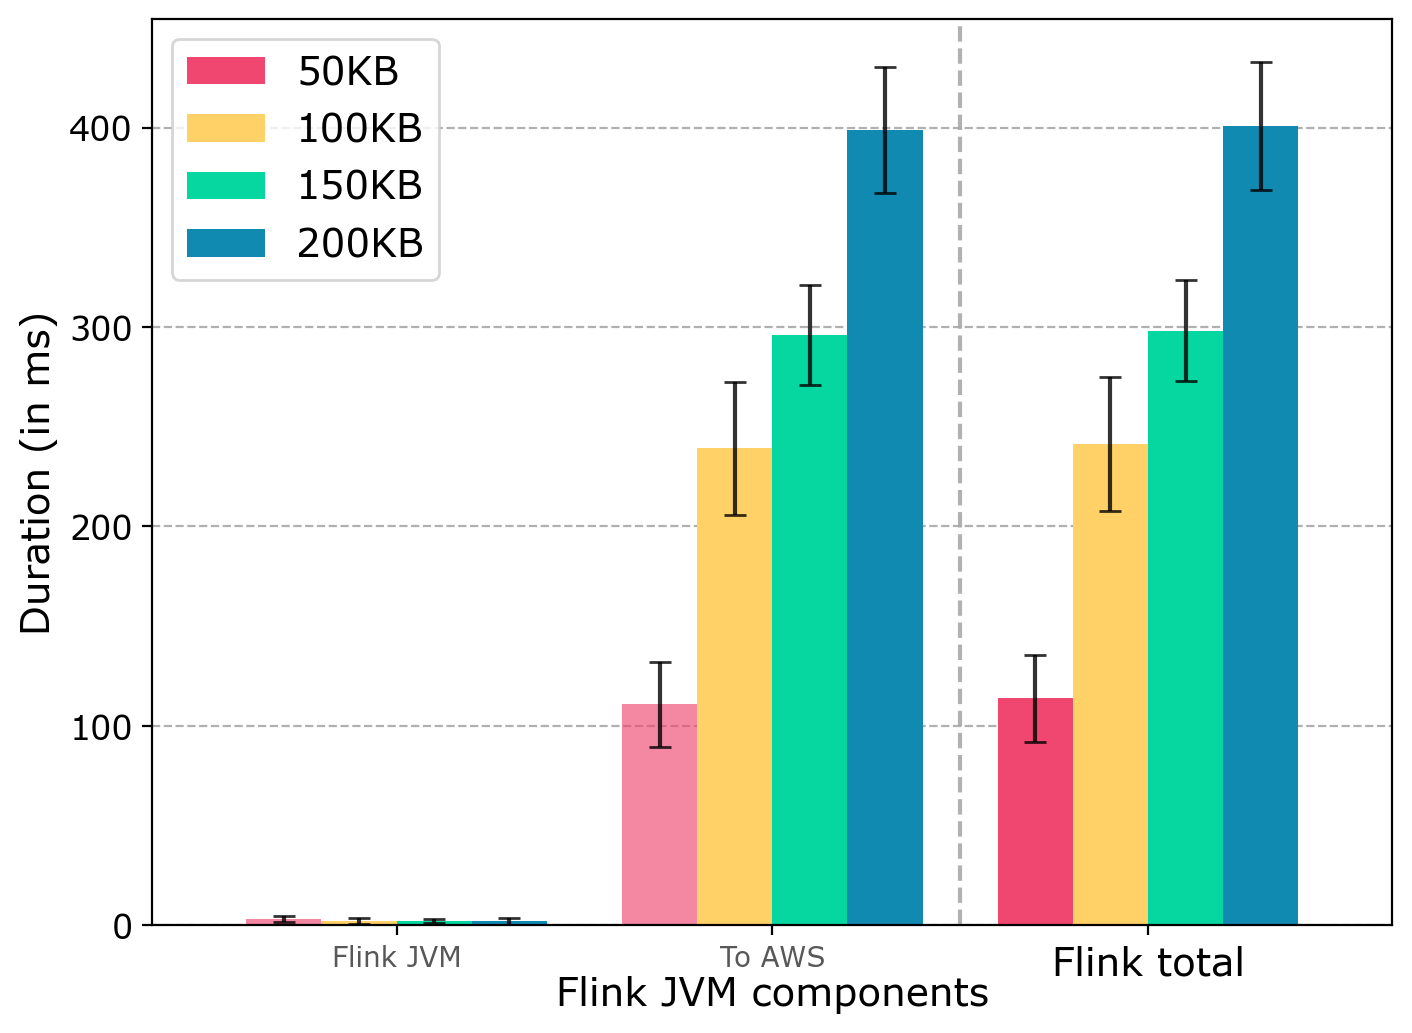

In [222]:
ax = overhead_mean.drop(["stateflow"], axis=0).plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=overhead_std.drop(["stateflow"], axis=0), rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
#ax.set_yscale('log')
for i in range(4, 6):
    #ax.get_children()[i].set_font_size(14)
    ax.get_children()[i].set_alpha(0.65)
        
ax.set_ylabel("Duration (in ms)", fontsize=14)
leg=plt.legend(loc=0, prop={"size": 14})
    
    
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Flink JVM", "To AWS", "Flink total"], fontsize=14)
#ax.set_yticks([0.1, 1, 10, 50, 100, 200])
plt.axvline(x=1.5, color="darkgray", linestyle="--", alpha=0.9)
for i, tick in enumerate(ax.xaxis.get_major_ticks()):
    if i > 1:
        continue
    tick.label.set_fontsize(10)
    tick.label.set_alpha(0.65)

for lh in leg.legendHandles: 
    lh.set_alpha(1)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0f'))
ax.text(1, -40, "Flink JVM components", horizontalalignment='center', fontsize=14)
#ax.text(3, -5, "Total", horizontalalignment='center', fontsize=14)
plt.savefig("flink_jvm_single_invocation_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [224]:
rel_fiftykb_mean = fiftykb_data[["stateflow", "flink"]].mean()
total_fiftykb = rel_fiftykb_mean.sum()
rel_fiftykb = ((rel_fiftykb_mean / total_fiftykb) * 100).to_frame("50KB")

rel_hundredkb_mean = hundredkb_data[["stateflow", "flink"]].mean()
total_hundredkb = rel_hundredkb_mean.sum()
rel_hundredkb = ((rel_hundredkb_mean / total_hundredkb) * 100).to_frame("100KB")

rel_hundredfiftykb_mean = hundredfiftykb_data[["stateflow", "flink"]].mean()
total_hundredfiftykb = rel_hundredfiftykb_mean.sum()
rel_hundredfiftykb = ((rel_hundredfiftykb_mean / total_hundredfiftykb) * 100).to_frame("150KB")

rel_twohundredkb_mean = twohundredkb_data[["stateflow", "flink"]].mean()
total_twohundredkb = rel_twohundredkb_mean.sum()
rel_twohundredkb = ((rel_twohundredkb_mean / total_twohundredkb) * 100).to_frame("200KB")

rel_overhead = pd.concat([rel_fiftykb, rel_hundredkb, rel_hundredfiftykb, rel_twohundredkb], axis=1)
#ax = rel_overhead.transpose().plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], rot=0, stacked=True, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
print(rel_overhead)

                50KB      100KB      150KB      200KB
stateflow   0.586912   0.381499   0.387249   0.358239
flink      99.413088  99.618501  99.612751  99.641761


# Various eg lengths, Flink + JVM

In [235]:
eg10_data = pd.read_csv("with_runtime/flink_eg_10.csv")
eg10_data = eg10_data[eg10_data["EVENT_SERIALIZATION_DURATION"] < eg10_data["EVENT_SERIALIZATION_DURATION"].quantile(0.95)] 

eg10_data["stateflow"] = eg10_data["ACTOR_CONSTRUCTION"] + eg10_data["ROUTING_DURATION"] + eg10_data["EVENT_SERIALIZATION_DURATION"] + eg10_data["STATE_SERIALIZATION_DURATION"] + eg10_data["EXECUTION_GRAPH_TRAVERSAL"]
eg10_data["flink"] = eg10_data["FLINK"] + eg10_data["TO_AWS"]

eg10_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,FLINK,ACTOR_CONSTRUCTION,TO_AWS,stateflow,flink
count,95.000000,95.000000,95.000000,95.000000,95.000000,0.0,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,51.252632,51.252632,0.061017,0.748143,0.032093,NaN,0.135827,4.621053,0.020119,106.915789,0.997200,111.536842
std,28.335741,28.335741,0.036585,0.059425,0.037515,NaN,0.034304,2.384252,0.013589,9.873307,0.093856,10.531423
min,2.000000,2.000000,0.039917,0.651440,0.009039,NaN,0.111830,1.000000,0.014546,94.000000,0.830778,97.000000
25%,27.500000,27.500000,0.044033,0.707285,0.018115,NaN,0.116641,3.000000,0.015755,99.000000,0.930822,103.000000
50%,51.000000,51.000000,0.048010,0.735635,0.029522,NaN,0.125322,4.000000,0.016392,104.000000,0.984631,109.000000
75%,75.500000,75.500000,0.052099,0.785119,0.033282,NaN,0.137281,5.000000,0.018029,112.000000,1.047321,118.500000
max,99.000000,99.000000,0.185669,0.937059,0.366155,NaN,0.292443,16.000000,0.128075,149.000000,1.299485,150.000000


In [236]:
eg100_data = pd.read_csv("with_runtime/flink_eg_100.csv")
eg100_data = eg100_data[eg100_data["EVENT_SERIALIZATION_DURATION"] < eg100_data["EVENT_SERIALIZATION_DURATION"].quantile(0.95)] 

eg100_data["stateflow"] = eg100_data["ACTOR_CONSTRUCTION"] + eg100_data["ROUTING_DURATION"] + eg100_data["EVENT_SERIALIZATION_DURATION"] + eg100_data["STATE_SERIALIZATION_DURATION"] + eg100_data["EXECUTION_GRAPH_TRAVERSAL"] 
eg100_data["flink"] = eg100_data["FLINK"] + eg100_data["TO_AWS"]

#eg100_data["stateflow"] = eg100_data[eg100_data["stateflow"] < eg100_data["stateflow"].quantile(0.95)]

eg100_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,FLINK,ACTOR_CONSTRUCTION,TO_AWS,stateflow,flink
count,95.000000,95.000000,95.000000,95.000000,95.000000,0.0,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,49.842105,49.842105,0.082764,1.131402,0.015774,NaN,1.134553,3.084211,0.018615,131.315789,2.383108,134.400000
std,28.793585,28.793585,0.050754,0.037828,0.009042,NaN,0.079240,1.541367,0.017198,13.810467,0.116221,14.003343
min,0.000000,0.000000,0.043228,1.069321,0.008148,NaN,1.013537,0.000000,0.012718,116.000000,2.163829,118.000000
25%,25.500000,25.500000,0.048191,1.103326,0.010304,NaN,1.061009,2.000000,0.013861,121.000000,2.282827,123.000000
50%,50.000000,50.000000,0.053096,1.124011,0.012469,NaN,1.122585,3.000000,0.014507,123.000000,2.395915,127.000000
75%,74.500000,74.500000,0.144313,1.155498,0.017983,NaN,1.197287,4.000000,0.015539,142.000000,2.467820,145.000000
max,99.000000,99.000000,0.188616,1.245628,0.062878,NaN,1.344305,11.000000,0.133024,187.000000,2.622975,189.000000


In [238]:
eg500_data = pd.read_csv("with_runtime/flink_eg_500.csv")
eg500_data = eg500_data[eg500_data["EVENT_SERIALIZATION_DURATION"] < eg500_data["EVENT_SERIALIZATION_DURATION"].quantile(0.95)] 
    
eg500_data["stateflow"] = eg500_data["ACTOR_CONSTRUCTION"] + eg500_data["ROUTING_DURATION"] + eg500_data["EVENT_SERIALIZATION_DURATION"] + eg500_data["STATE_SERIALIZATION_DURATION"] + eg100_data["STATE_SERIALIZATION_DURATION"] + eg500_data["EXECUTION_GRAPH_TRAVERSAL"] 
eg500_data["flink"] = eg500_data["FLINK"] + eg500_data["TO_AWS"]
#eg500_data["stateflow"] = eg500_data[eg500_data["stateflow"] < eg500_data["stateflow"].quantile(0.95)]

eg500_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,FLINK,ACTOR_CONSTRUCTION,TO_AWS,stateflow,flink
count,95.000000,95.000000,95.000000,95.000000,95.000000,0.0,95.000000,95.000000,95.000000,95.000000,90.000000,95.000000
mean,49.147368,49.147368,0.166238,2.724829,0.009982,NaN,8.035233,2.684211,0.015325,198.757895,11.048215,201.442105
std,29.351490,29.351490,0.415083,0.113758,0.008714,NaN,4.229829,1.438551,0.002220,25.503740,4.282513,25.502906
min,0.000000,0.000000,0.067953,2.535991,0.004785,NaN,5.023222,0.000000,0.013275,129.000000,7.755902,132.000000
25%,23.500000,23.500000,0.080594,2.644215,0.006414,NaN,5.174757,2.000000,0.014380,192.000000,8.115570,194.000000
50%,49.000000,49.000000,0.090746,2.699536,0.008271,NaN,5.362566,3.000000,0.015008,196.000000,8.308656,199.000000
75%,73.500000,73.500000,0.189186,2.773070,0.010100,NaN,9.662025,3.000000,0.015543,205.000000,12.640131,208.000000
max,99.000000,99.000000,4.134090,3.085749,0.068053,NaN,17.691710,9.000000,0.029324,381.000000,20.662572,384.000000


In [239]:
eg1000_data = pd.read_csv("with_runtime/flink_eg_1000.csv")
eg1000_data = eg1000_data[eg1000_data["EVENT_SERIALIZATION_DURATION"] < eg1000_data["EVENT_SERIALIZATION_DURATION"].quantile(0.95)]
    
eg1000_data["stateflow"] = eg1000_data["ACTOR_CONSTRUCTION"] + eg1000_data["ROUTING_DURATION"] + eg1000_data["EVENT_SERIALIZATION_DURATION"] + eg1000_data["STATE_SERIALIZATION_DURATION"] + + eg500_data["STATE_SERIALIZATION_DURATION"] + eg100_data["STATE_SERIALIZATION_DURATION"] + eg1000_data["EXECUTION_GRAPH_TRAVERSAL"] 
eg1000_data["flink"] = eg1000_data["FLINK"] + eg1000_data["TO_AWS"]
#eg1000_data["stateflow"] = eg1000_data[eg1000_data["stateflow"] < eg1000_data["stateflow"].quantile(0.95)]
    
eg1000_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTOR,EXECUTION_GRAPH_TRAVERSAL,FLINK,ACTOR_CONSTRUCTION,TO_AWS,stateflow,flink
count,95.000000,95.000000,95.000000,95.000000,95.000000,0.0,95.000000,95.000000,95.000000,95.000000,87.000000,95.000000
mean,49.747368,49.747368,0.244343,7.105826,0.007621,NaN,18.891435,2.947368,0.016631,259.368421,26.878812,262.315789
std,28.650858,28.650858,0.844406,17.243862,0.003052,NaN,7.224761,1.223601,0.006088,32.011651,19.803903,32.026008
min,1.000000,1.000000,0.083796,4.587497,0.004926,NaN,10.355972,1.000000,0.012871,178.000000,15.435347,180.000000
25%,25.500000,25.500000,0.090568,4.736873,0.006030,NaN,12.808066,2.000000,0.014433,245.000000,19.813079,247.500000
50%,50.000000,50.000000,0.094304,4.948646,0.006726,NaN,18.805408,3.000000,0.015091,256.000000,25.008628,258.000000
75%,73.500000,73.500000,0.155178,5.190165,0.007950,NaN,22.738723,4.000000,0.015678,275.000000,28.189075,278.000000
max,99.000000,99.000000,6.091054,172.604080,0.022429,NaN,62.063671,9.000000,0.054151,450.000000,195.734219,455.000000


In [240]:
eg10_mean = eg10_data[["stateflow", "FLINK", "TO_AWS", "flink"]].mean().to_frame(name="10 nodes")
eg100_mean = eg100_data[["stateflow", "FLINK", "TO_AWS", "flink"]].mean().to_frame(name="100 nodes")
eg500_mean = eg500_data[["stateflow", "FLINK", "TO_AWS", "flink"]].mean().to_frame(name="500 nodes")
eg1000_mean = eg1000_data[["stateflow", "FLINK", "TO_AWS", "flink"]].mean().to_frame(name="1000 nodes")

eg10_std = eg10_data[["stateflow", "FLINK", "TO_AWS", "flink"]].std().to_frame(name="10 nodes")
eg100_std = eg100_data[["stateflow", "FLINK", "TO_AWS", "flink"]].std().to_frame(name="100 nodes")
eg500_std = eg500_data[["stateflow", "FLINK", "TO_AWS", "flink"]].std().to_frame(name="500 nodes")
eg1000_std = eg1000_data[["stateflow", "FLINK", "TO_AWS", "flink"]].std().to_frame(name="1000 nodes")


eg_mean = pd.concat([eg10_mean, eg100_mean, eg500_mean, eg1000_mean], axis=1)
eg_std = pd.concat([eg10_std, eg100_std, eg500_std, eg1000_std], axis=1)
eg_flink_mean = eg_mean.loc[["stateflow", "flink"]].rename({"stateflow": "stateflow_flink"})
eg_flink_std = eg_std.loc[["stateflow", "flink"]].rename({"stateflow": "stateflow_flink"})
print(eg_flink_mean)
print(eg_flink_std)
print(eg_mean)
print(eg_std)

                   10 nodes   100 nodes   500 nodes  1000 nodes
stateflow_flink    0.997200    2.383108   11.048215   26.878812
flink            111.536842  134.400000  201.442105  262.315789
                  10 nodes  100 nodes  500 nodes  1000 nodes
stateflow_flink   0.093856   0.116221   4.282513   19.803903
flink            10.531423  14.003343  25.502906   32.026008
             10 nodes   100 nodes   500 nodes  1000 nodes
stateflow    0.997200    2.383108   11.048215   26.878812
FLINK        4.621053    3.084211    2.684211    2.947368
TO_AWS     106.915789  131.315789  198.757895  259.368421
flink      111.536842  134.400000  201.442105  262.315789
            10 nodes  100 nodes  500 nodes  1000 nodes
stateflow   0.093856   0.116221   4.282513   19.803903
FLINK       2.384252   1.541367   1.438551    1.223601
TO_AWS      9.873307  13.810467  25.503740   32.011651
flink      10.531423  14.003343  25.502906   32.026008


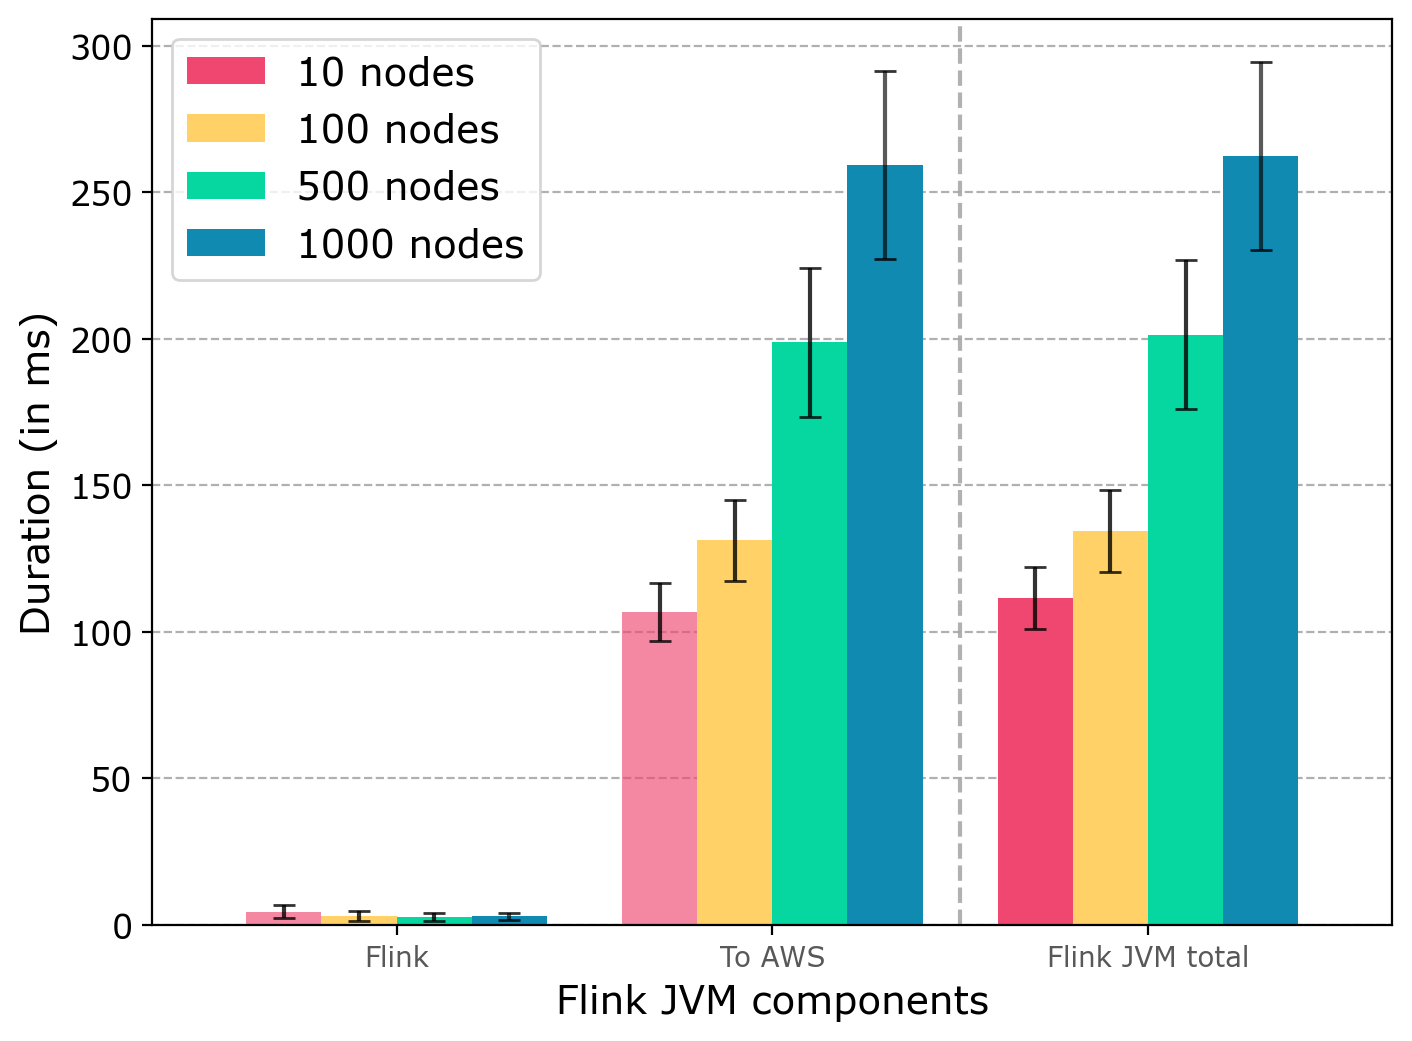

In [247]:
ax = eg_mean.drop(["stateflow"], axis=0).plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=eg_std.drop(["stateflow"], axis=0), rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
#ax.set_yscale('log')
for i in range(3, 6):
    #ax.get_children()[i].set_font_size(14)
    ax.get_children()[i].set_alpha(0.65)
        
ax.set_ylabel("Duration (in ms)", fontsize=14)
leg=plt.legend(loc=0, prop={"size": 14})
    
    
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Flink", "To AWS", "Flink JVM total"], fontsize=14)
#ax.set_yticks([0.1, 1, 10, 50, 100, 200])
plt.axvline(x=1.5, color="darkgray", linestyle="--", alpha=0.9)
for i, tick in enumerate(ax.xaxis.get_major_ticks()):
    if i > 2:
        continue
    tick.label.set_fontsize(10)
    tick.label.set_alpha(0.65)

for lh in leg.legendHandles: 
    lh.set_alpha(1)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0f'))
ax.text(1, -30, "Flink JVM components", horizontalalignment='center', fontsize=14)
#ax.text(3, -5, "Total", horizontalalignment='center', fontsize=14)
plt.savefig("flink_eg_length_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [248]:
rel_eg10_mean = eg10_data[["stateflow", "flink"]].mean()
total_eg10 = rel_eg10_mean.sum()
rel_eg10 = ((rel_eg10_mean / total_eg10) * 100).to_frame("10 nodes")

rel_eg100_mean = eg100_data[["stateflow", "flink"]].mean()
total_eg100 = rel_eg100_mean.sum()
rel_eg100 = ((rel_eg100_mean / total_eg100) * 100).to_frame("100 nodes")

rel_eg500_mean = eg500_data[["stateflow", "flink"]].mean()
total_eg500 = rel_eg500_mean.sum()
rel_eg500 = ((rel_eg500_mean / total_eg500) * 100).to_frame("150 nodes")

rel_eg1000_mean = eg1000_data[["stateflow", "flink"]].mean()
total_eg1000 = rel_eg1000_mean.sum()
rel_eg1000 = ((rel_eg1000_mean / total_eg1000) * 100).to_frame("1000 nodes")

rel_eg = pd.concat([rel_eg10, rel_eg100, rel_eg500, rel_eg1000], axis=1)
#ax = rel_overhead.transpose().plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], rot=0, stacked=True, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
print(rel_eg)

            10 nodes  100 nodes  150 nodes  1000 nodes
stateflow   0.886131   1.742253   5.199397    9.294369
flink      99.113869  98.257747  94.800603   90.705631


# Various state sizes, AWS Lambda + PyFlink + Statefun

In [225]:
print(state_aws_mean)
print(state_aws_std)

print(state_statefun_mean)
print(state_statefun_std)

print(state_pyflink_mean)
print(state_pyflink_std)

print(state_flink_mean)
print(state_flink_std)

                    50KB      100KB      150KB      200KB
stateflow_aws   0.214421   0.236191   0.255173   0.266692
aws            32.761144  42.008038  52.432530  48.672621
                    50KB     100KB     150KB     200KB
stateflow_aws   0.009071  0.015610  0.034211  0.023815
aws            18.466893  3.819552  7.563838  2.839876
                         50KB      100KB      150KB      200KB
stateflow_statefun   0.260195   0.246396   0.230245   0.385553
statefun            54.783582  57.928027  60.122284  55.957320
                        50KB     100KB      150KB     200KB
stateflow_statefun  0.090226  0.114452   0.112030  0.125527
statefun            6.429499  7.991912  10.072591  7.811788
                         50KB       100KB      150KB       200KB
stateflow_pyflink    0.152997    0.130833   0.140226    0.162688
pyflink            178.583582  102.716916  93.772471  202.717790
                        50KB      100KB      150KB     200KB
stateflow_pyflink   0.029399   0.011

In [226]:
state_std = pd.concat([state_aws_std, state_statefun_std, state_pyflink_std, state_flink_std])
state_mean = pd.concat([state_aws_mean, state_statefun_mean, state_pyflink_mean, state_flink_mean])
state_mean

,50KB,100KB,150KB,200KB
stateflow_aws,0.214421,0.236191,0.255173,0.266692
aws,32.761144,42.008038,52.432530,48.672621
stateflow_statefun,0.260195,0.246396,0.230245,0.385553
statefun,54.783582,57.928027,60.122284,55.957320
stateflow_pyflink,0.152997,0.130833,0.140226,0.162688
pyflink,178.583582,102.716916,93.772471,202.717790
stateflow_flink,0.672144,0.923929,1.159305,1.440625
flink,113.850000,241.260000,298.210000,400.700000


<Figure size 6000x1600 with 0 Axes>

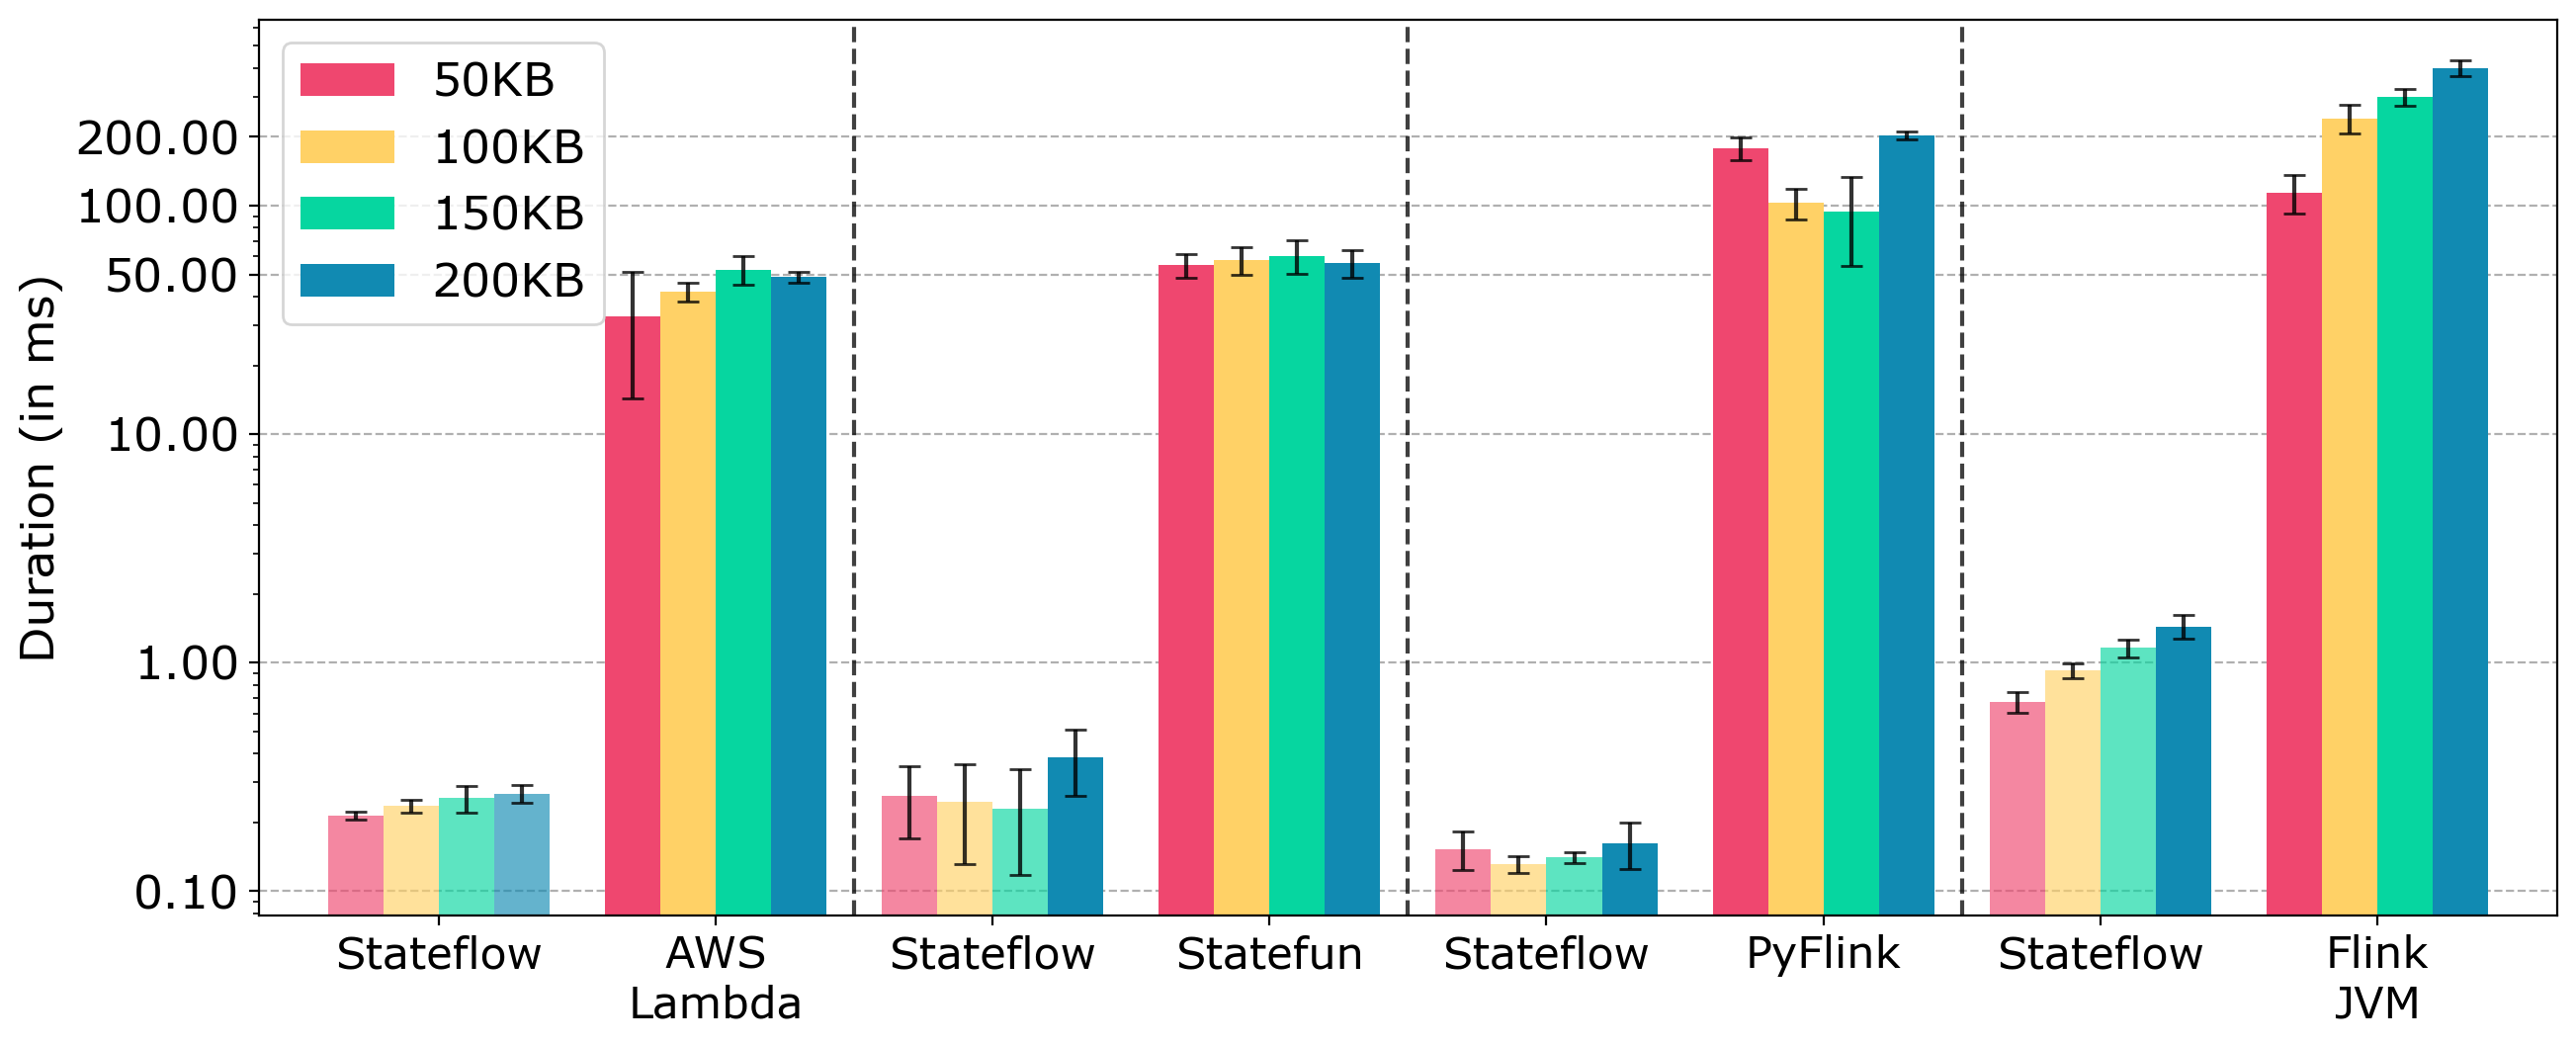

In [227]:
plt.figure(figsize=(30,8))
ax = state_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=state_std, rot=0, fontsize=17, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80}, figsize=(15, 6))
ax.set_axisbelow(True)
for i in range(4, 29):
    if i % 2 == 0:
        ax.get_children()[i].set_alpha(0.65)

plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=17)
leg = plt.legend(loc=0, prop={"size": 17})

for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Stateflow", "AWS\nLambda", "Stateflow", "Statefun", "Stateflow", "PyFlink", "Stateflow", "Flink\nJVM"], fontsize=16)
#ax.set_xticks([0, 1, 1.5, 2, 3, 4, 5])
ax.set_yticks([0.1, 1, 10, 50, 100, 200])
plt.axvline(x=1.5, color="black", linestyle="--", alpha=0.75)
plt.axvline(x=3.5, color="black", linestyle="--", alpha=0.75)
plt.axvline(x=5.5, color="black", linestyle="--", alpha=0.75)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("all_single_invocation_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

# Various eg lengths, AWS Lambda + PyFlink + Statefun

In [249]:
print(eg_aws_mean)
print(eg_aws_std)

print(eg_statefun_mean)
print(eg_statefun_std)

print(eg_pyflink_mean)
print(eg_pyflink_std)

print(eg_flink_mean)
print(eg_flink_std)

                10 nodes  100 nodes  500 nodes  1000 nodes
stateflow_aws   0.433119   1.818115   7.676424   18.037262
aws            38.092631  38.086479  38.870455   42.622029
               10 nodes  100 nodes  500 nodes  1000 nodes
stateflow_aws  0.013232   0.060780   0.297779    4.880993
aws            2.701524   4.134519   5.043490    6.554492
                     10 nodes  100 nodes  500 nodes  1000 nodes
stateflow_statefun   0.790379   3.025629  11.153158   21.714499
statefun            52.439138  43.039138  24.369475   52.411865
                    10 nodes  100 nodes  500 nodes  1000 nodes
stateflow_statefun  0.115212   1.458561   4.780056   10.066528
statefun            3.538552  12.266516  23.334409   36.450794
                     10 nodes   100 nodes
stateflow_pyflink    0.542863    2.125507
pyflink            156.139138  110.403183
                    10 nodes  100 nodes
stateflow_pyflink   0.311089   1.734124
pyflink            25.817532  27.218402
                   10 

In [250]:
eg_std = pd.concat([eg_aws_std, eg_statefun_std,eg_pyflink_std, eg_flink_std])
eg_mean = pd.concat([eg_aws_mean, eg_statefun_mean, eg_pyflink_mean, eg_flink_mean])
eg_mean

,10 nodes,100 nodes,500 nodes,1000 nodes
stateflow_aws,0.433119,1.818115,7.676424,18.037262
aws,38.092631,38.086479,38.870455,42.622029
stateflow_statefun,0.790379,3.025629,11.153158,21.714499
statefun,52.439138,43.039138,24.369475,52.411865
stateflow_pyflink,0.542863,2.125507,NaN,NaN
pyflink,156.139138,110.403183,NaN,NaN
stateflow_flink,0.997200,2.383108,11.048215,26.878812
flink,111.536842,134.400000,201.442105,262.315789


<Figure size 4000x1200 with 0 Axes>

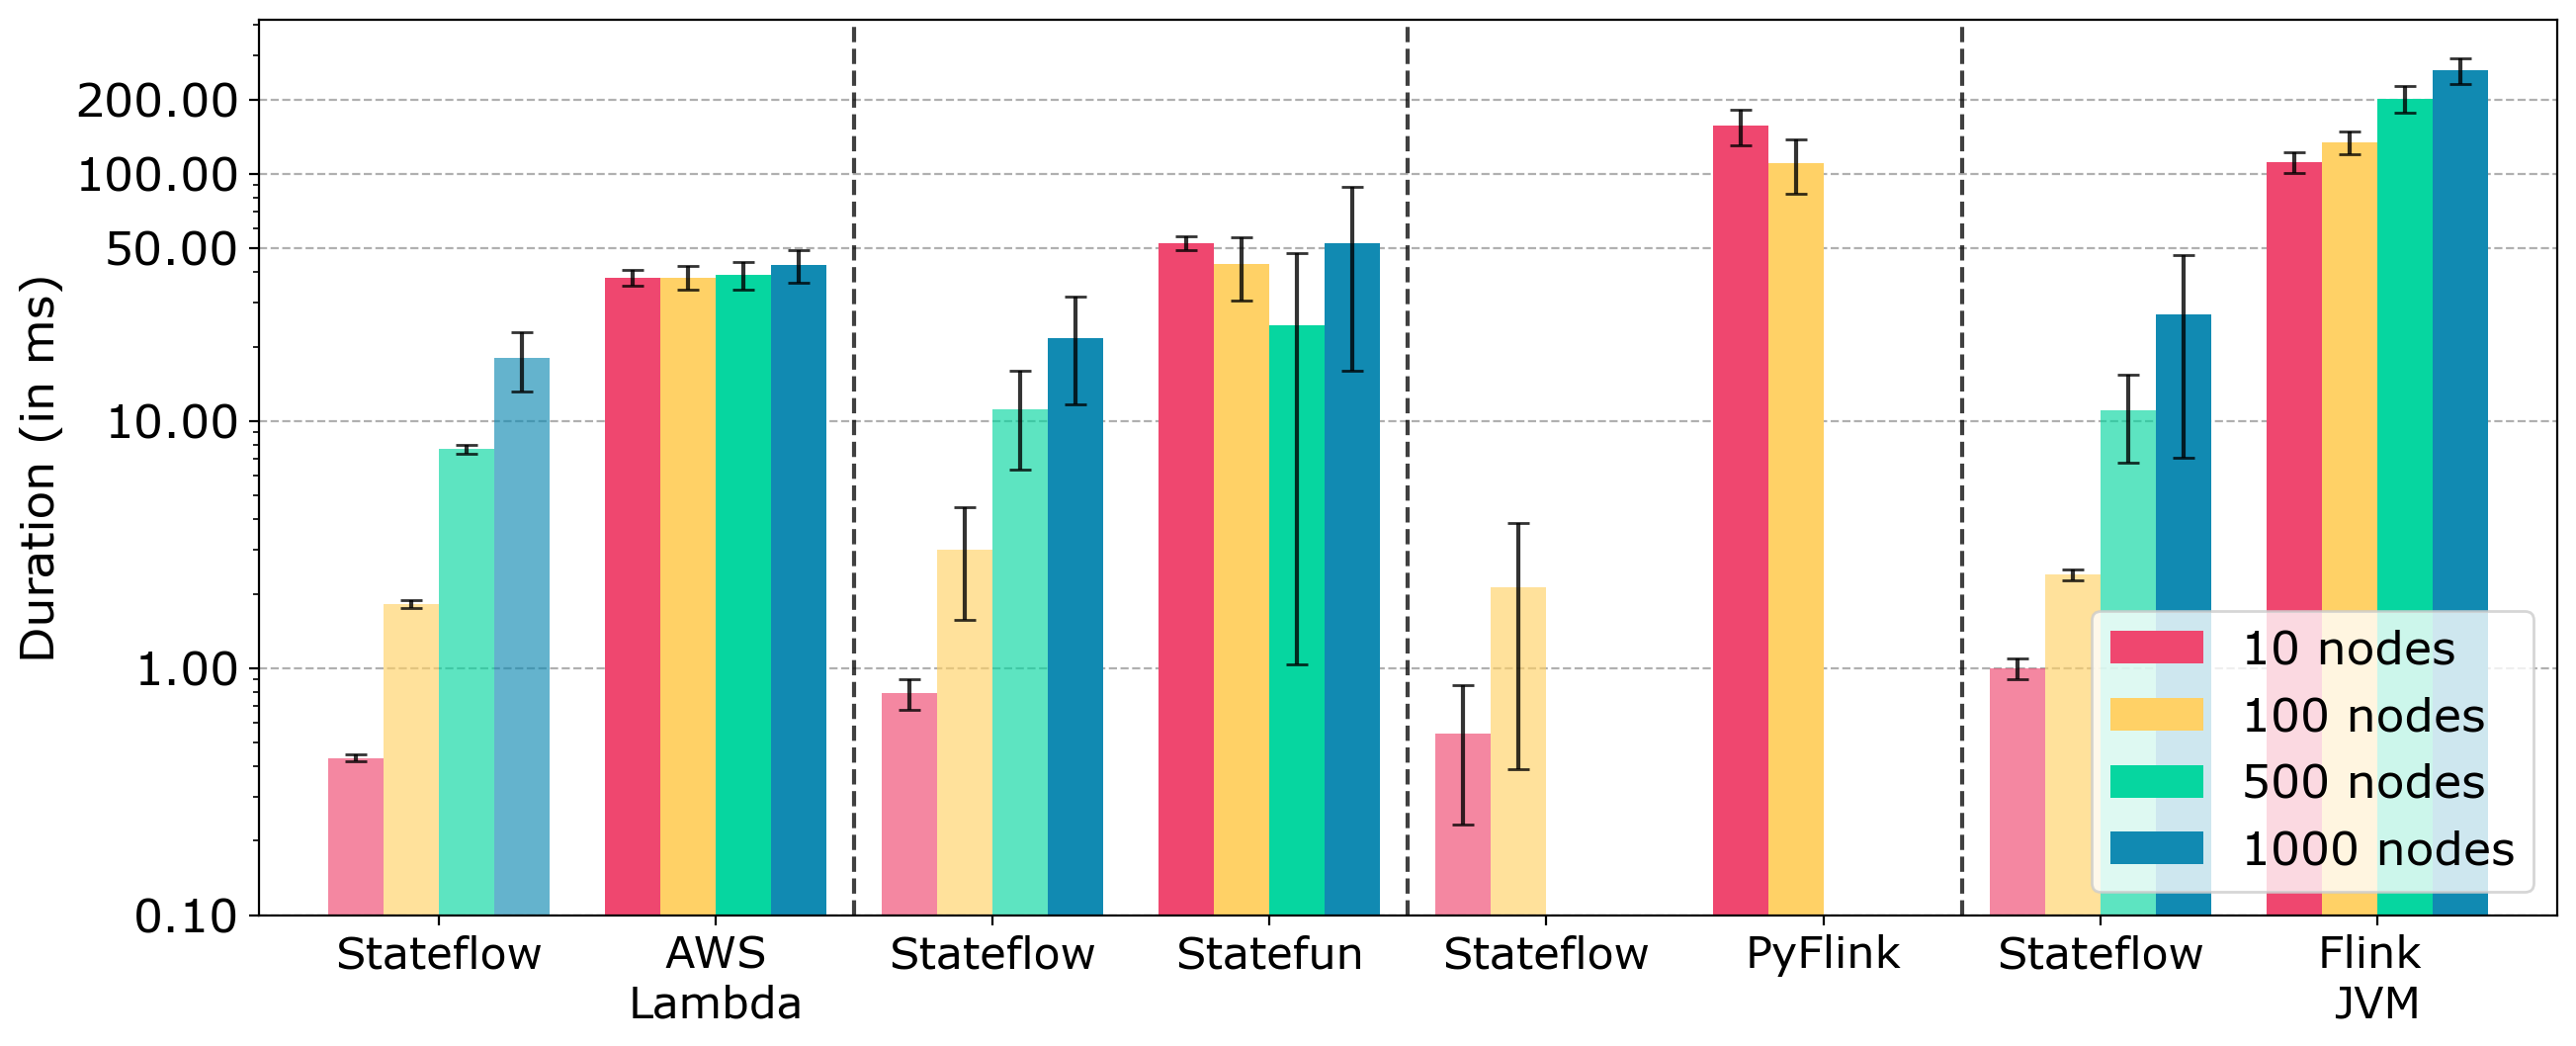

In [254]:
plt.figure(figsize=(20,6))
ax = eg_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=eg_std, rot=0, fontsize=17, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80}, figsize=(15, 6))
ax.set_axisbelow(True)
for i in range(4, 30):
    if i % 2 == 0:
        ax.get_children()[i].set_alpha(0.65)

plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=17)
leg = plt.legend(loc=0, prop={"size": 17})

for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Stateflow", "AWS\nLambda", "Stateflow", "Statefun", "Stateflow", "PyFlink", "Stateflow", "Flink \nJVM"], fontsize=16)
#ax.set_xticks([0, 1, 1.5, 2, 3, 4, 5])
ax.set_yticks([0.1, 1, 10, 50, 100, 200])
plt.axvline(x=1.5, color="black", linestyle="--", alpha=0.75)
plt.axvline(x=3.5, color="black", linestyle="--", alpha=0.75)
plt.axvline(x=5.5, color="black", linestyle="--", alpha=0.75)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("all_eg_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

# Various interactions, AWS Lambda + PyFlink + Statefun

In [ ]:
print(in_aws_mean)
print(in_aws_std)

print(in_statefun_mean)
print(in_statefun_std)

print(in_pyflink_mean)
print(in_pyflink_std)

In [ ]:
in_std = pd.concat([in_aws_std, in_statefun_std, in_pyflink_std])
in_mean = pd.concat([in_aws_mean, in_statefun_mean, in_pyflink_mean])
in_mean

In [ ]:
plt.figure(figsize=(20,6))
ax = in_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=in_std, rot=0, fontsize=17, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80}, figsize=(15, 6))
ax.set_axisbelow(True)
for i in range(4, 29):
    if i % 2 == 0:
        ax.get_children()[i].set_alpha(0.65)

plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=17)
leg = plt.legend(loc=0, prop={"size": 17})

for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Stateflow", "AWS\nLambda", "Stateflow", "Statefun", "Stateflow", "PyFlink"], fontsize=16)
#ax.set_xticks([0, 1, 1.5, 2, 3, 4, 5])
ax.set_yticks([1, 10, 100, 1000, 5000])
plt.axvline(x=1.5, color="black", linestyle="--", alpha=0.75)
plt.axvline(x=3.5, color="black", linestyle="--", alpha=0.75)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("all_in_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()